In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('/notebooks/pytorch_timeseries'))

from torch_timeseries.experiments.hstgnn_experimentv3 import HSTGNNv3Experiment
from torch_timeseries.experiments.hstgnn_experimentv7 import HSTGNNv7Experiment
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch
import sys
import os
sys.path.insert(0, os.path.abspath('/notebooks/pytorch_timeseries'))

from torch_timeseries.experiments.hstgnn_experimentv3 import HSTGNNv3Experiment
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
def get_pred(exp, which, device):
    batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc = exp.dataloader.train_dataset[which]
    batch_x = torch.tensor(batch_x).unsqueeze(0).to(device).float()
    batch_y = torch.tensor(batch_y).unsqueeze(0).to(device).float()
    batch_origin_y = torch.tensor(batch_origin_y).unsqueeze(0).to(device).float()
    batch_x_date_enc = torch.tensor(batch_x_date_enc).unsqueeze(0).to(device).float()
    batch_y_date_enc = torch.tensor(batch_y_date_enc).unsqueeze(0).to(device).float()


    exp.dataloader.train_dataset[0]
    y = batch_y
    x = exp.dataloader.train_dataset.scaler.inverse_transform(batch_x).transpose(1,2)

    batch_x = batch_x.transpose(1,2).to(device)
    pred_y = exp.model(batch_x, batch_x_date_enc)

    return pred_y



def get_dynamic_embed_graph(exp, which, device):
    batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc = exp.dataloader.train_dataset[which]
    batch_x = torch.tensor(batch_x).unsqueeze(0).to(device).float()
    batch_y = torch.tensor(batch_y).unsqueeze(0).to(device).float()
    batch_origin_y = torch.tensor(batch_origin_y).unsqueeze(0).to(device).float()
    batch_x_date_enc = torch.tensor(batch_x_date_enc).unsqueeze(0).to(device).float()
    batch_y_date_enc = torch.tensor(batch_y_date_enc).unsqueeze(0).to(device).float()


    exp.dataloader.train_dataset[0]
    y = batch_y
    x = exp.dataloader.train_dataset.scaler.inverse_transform(batch_x).transpose(1,2)

    batch_x = batch_x.transpose(1,2).to(device)
    pred_y = exp.model(batch_x, batch_x_date_enc)
    Xs = exp.model.spatial_encoder(batch_x)
    Xt = exp.model.temporal_encoder(batch_x.transpose(1,2), batch_x_date_enc)
    # X = torch.concat([Xs, Xt], dim=1)  # (B, N+T, latent_dim)
    A, edge_index, edge_weight = exp.model.tn_modules[0].graph_constructor(Xs, Xt)
    return Xs, Xt, A 

def plot_adj(adj_matrix, s_num=8, t_num=8):
# 假设这是你的邻接矩阵
    # adj_matrix = adj[0].detach().cpu().numpy()

    # 使用 matplotlib 绘制热力图
    plt.imshow(adj_matrix, cmap='hot', interpolation='nearest')
    plt.axhline(y=t_num, color='blue', linestyle='-')
    plt.axvline(x=s_num, color='green', linestyle='-')

    plt.colorbar()
    plt.title('Adjacency Matrix Heatmap')
    plt.show()
    
def plot_dynamic_embedding(Xs, Xt, exp):
    import numpy as np
    s_emb = exp.model.spatial_encoder.static_node_embedding.weight
    t_emb = exp.model.temporal_encoder.static_node_embedding.weight
    # Concatenate s_emb and t_emb
    combined_emb = np.concatenate((Xs[0].detach().cpu().numpy(), Xt[0].detach().cpu().numpy()), axis=0)
    # # Apply t-SNE to reduce dimensionality to 2 components
    tsne = TSNE(n_components=2, perplexity=5, random_state=10)
    combined_emb_tsne = tsne.fit_transform(combined_emb)

    # # Separate the t-SNE results back into s_emb and t_emb

    l = len(s_emb) # + 215

    s_emb_tsne = combined_emb_tsne[:l]
    t_emb_tsne = combined_emb_tsne[l:]

    # Create a scatter plot
    plt.scatter(s_emb_tsne[:, 0], s_emb_tsne[:, 1], label='spatial nodes')
    plt.scatter(t_emb_tsne[:, 0], t_emb_tsne[:, 1], label='temporal nodes')
    plt.title('t-SNE Visualization')
    plt.legend()
    plt.show()
    
    
def plot_window(exp, which):
    batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc = exp.dataloader.train_dataset[which]
    x = exp.dataloader.train_dataset.scaler.inverse_transform(batch_x)
    original_x = x.transpose(1, 0)
    # 创建多维时序图
    plt.figure(figsize=(15, 10))
    N = original_x.shape[0]
    # 绘制每个维度的时序数据
    for i in range(N):
        plt.plot(original_x[i, :], label=f'Series {i+1}')
    plt.title('Multidimensional Time Series Plot')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)


def plot_window_exclude(exp, which, exclude=[0]):
    batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc = exp.dataloader.train_dataset[which]
    x = exp.dataloader.train_dataset.scaler.inverse_transform(batch_x)
    original_x = x.transpose(1, 0)
    # 创建多维时序图
    plt.figure(figsize=(15, 10))
    N = original_x.shape[0]
    # 绘制每个维度的时序数据
    for i in range(N):
        if i in exclude:
            continue
        plt.plot(original_x[i, :], label=f'Series {i+1}')
    plt.title('Multidimensional Time Series Plot')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)


/root/anaconda3/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 1 Model Resume

In [3]:
import sys
import os
sys.path.insert(0, os.path.abspath('/notebooks/pytorch_timeseries'))

from torch_timeseries.experiments.hstgnn_experimentv3 import HSTGNNv3Experiment
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# exp = BiSTGNNv6Experiment(
#     dataset_type="Traffic", # PEMS_BAY  PEMS04 PEMS07 METR_LA
#     # dataset_type="ExchangeRate",
#     output_layer_type="tcn6",
#     latent_dim=32,
#     gcn_layers=2,
#     tcn_channel=16,
#     self_loop_eps=0.1,
#     tcn_layers=3,
#     pred_len=3,
#     batch_size=32,
#     horizon=1,
#     data_path='../data',
#     save_dir='../results',
#     model_type="BiSTGNNv6",
#     windows=12
# )
# exp = HSTGNNv3Experiment(
#     dataset_type="SP500", # PEMS_BAY  PEMS04 PEMS07 METR_LA
#     # dataset_type="ExchangeRate",
#     batch_size=32,
#     horizon=24,
#     pred_len=1,
#     data_path='../data',
#     save_dir='../results/',
#     windows=40
# )


exp = HSTGNNv3Experiment(
    dataset_type="Traffic", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    # dataset_type="ExchangeRate",
    batch_size=32,
    horizon=12,
    pred_len=1,
    data_path='../data',
    save_dir='../results/',
    windows=168,
    device="cpu"
)

# # 42,233,666,19971203,19980224

seed = 42
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)


Using downloaded and verified file: ../data/traffic/traffic.txt.gz
Extracting ../data/traffic/traffic.txt.gz to ../data/traffic


train steps: 12101
val steps: 3329
test steps: 1577
torch.get_default_dtype() torch.float32
graph_build_type dis mlpsim_direc_tt_mask
result directory exists: ../results/runs/HSTGNNv3/Traffic/w168h12s1/e11141ed0340539bcd3a2559719366c8


In [20]:
s_emb

Parameter containing:
tensor([[ 1.6381e-42,  1.2272e-40,  1.1907e-41,  ...,  1.9017e-41,
         -1.0675e-41, -2.0887e-02],
        [-3.2688e-09, -6.3619e-43,  2.3937e-41,  ..., -6.4572e-42,
         -3.6638e-41,  3.9547e-15],
        [-2.0102e-41,  1.6816e-44, -2.7831e-18,  ...,  1.1070e-41,
         -2.8601e-42,  5.1368e-05],
        ...,
        [ 3.8059e-42,  2.5293e-22,  1.6052e-41,  ...,  1.1212e-06,
         -4.1177e-17, -6.9701e-42],
        [-9.1919e-04,  2.8041e-41,  1.3614e-20,  ..., -2.1063e-08,
          2.3733e-17,  2.4087e-41],
        [-1.9940e-41, -8.1229e-18,  1.8924e-02,  ..., -9.9086e-42,
          2.3682e-43, -2.8011e-41]], requires_grad=True)

In [19]:
s_emb = exp.model.temporal_encoder.static_node_embedding.weight
s_emb.shape
t_emb = exp.model.spatial_encoder.static_node_embedding.weight
t_emb.shape

torch.Size([862, 16])

In [27]:
t_emb.shape

torch.Size([862, 16])

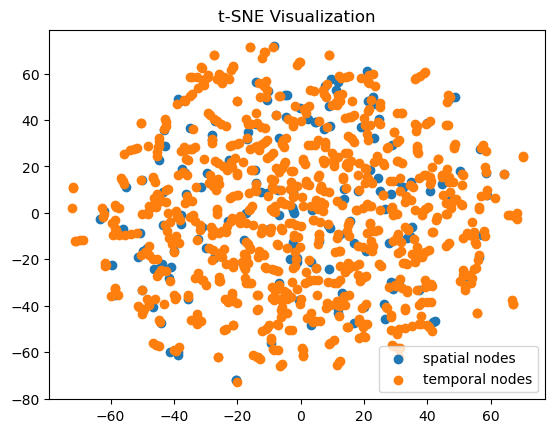

In [34]:
import numpy as np
s_emb = exp.model.temporal_encoder.static_node_embedding.weight
t_emb = exp.model.spatial_encoder.static_node_embedding.weight
# Concatenate s_emb and t_emb
combined_emb = np.concatenate((s_emb.detach().cpu().numpy(), t_emb.detach().cpu().numpy()), axis=0)

# # Apply t-SNE to reduce dimensionality to 2 components
tsne = TSNE(n_components=2, perplexity=5, random_state=10)
combined_emb_tsne = tsne.fit_transform(combined_emb)

# # Separate the t-SNE results back into s_emb and t_emb

l = len(s_emb) # + 215

s_emb_tsne = combined_emb_tsne[:l]
t_emb_tsne = combined_emb_tsne[l:]

# Create a scatter plot
plt.scatter(s_emb_tsne[:, 0], s_emb_tsne[:, 1], label='spatial nodes')
plt.scatter(t_emb_tsne[:, 0], t_emb_tsne[:, 1], label='temporal nodes')
plt.title('t-SNE Visualization')
plt.legend()
plt.show()


In [31]:
s_emb_tsne.shape

(168, 3)

# 1 data over view

In [172]:
# import torch
# for x, y, x_date_enc, y_date_enc in exp.dataloader.test_loader:
# # batch_x = torch.from_numpy(x).float().unsqueeze(0).to("cuda:0")
# # batch_x_date_enc = torch.from_numpy(x).float().unsqueeze(0).to("cuda:0")
#     predicted = exp._process_one_batch(x, y, x_date_enc, y_date_enc)# exp.model(batch_x.transpose(1,2), batch_x_date_enc)
#     break

In [173]:
exp.model.spatial_encoder.static_node_embedding,exp.model.temporal_encoder.static_node_embedding

(Embedding(7, 16), Embedding(288, 16))

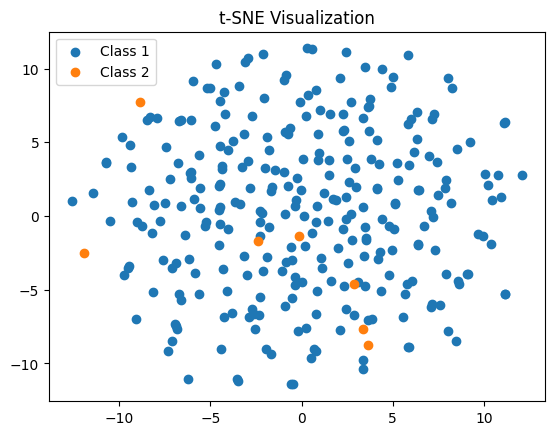

In [92]:
215 * 5 / 60

17.916666666666668

In [148]:
combined_emb_tsne[l-1]

array([ 0.45480874, 17.813908  ], dtype=float32)

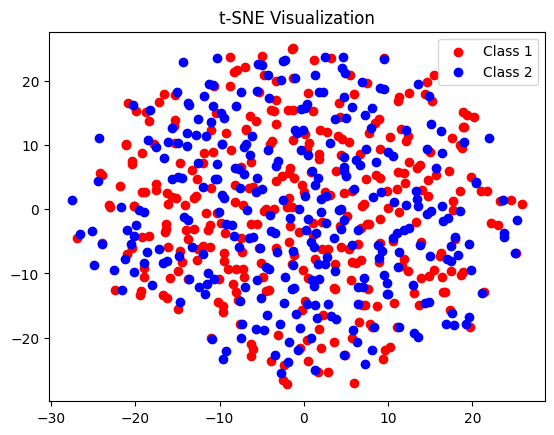

In [63]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming you have s_emb and t_emb defined as NumPy arrays
s_emb = np.random.rand(325, 16)  # Replace with your actual s_emb data
t_emb = np.random.rand(288, 16)  # Replace with your actual t_emb data

# Concatenate s_emb and t_emb
combined_emb = np.concatenate((s_emb, t_emb), axis=0)

# Create labels for s_emb and t_emb
s_labels = np.zeros(len(s_emb))  # Class 1
t_labels = np.ones(len(t_emb))   # Class 2
combined_labels = np.concatenate((s_labels, t_labels), axis=0)

# Apply t-SNE to reduce dimensionality to 2 components
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
combined_emb_tsne = tsne.fit_transform(combined_emb)

# Separate the t-SNE results by class
s_emb_tsne = combined_emb_tsne[combined_labels == 0]
t_emb_tsne = combined_emb_tsne[combined_labels == 1]

# Create a scatter plot
plt.scatter(s_emb_tsne[:, 0], s_emb_tsne[:, 1], label='Class 1', c='red')
plt.scatter(t_emb_tsne[:, 0], t_emb_tsne[:, 1], label='Class 2', c='blue')
plt.title('t-SNE Visualization')
plt.legend()
plt.show()


In [34]:
batch_x.size()

torch.Size([1, 288, 325])

# 2 Graph Learning 

## 2.1 Learned graph and heterogeneity

In [10]:
import torch

which = 0 

batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc = exp.dataloader.train_dataset[which]
batch_x = torch.tensor(batch_x).unsqueeze(0)
batch_y = torch.tensor(batch_y).unsqueeze(0)
batch_origin_y = torch.tensor(batch_origin_y).unsqueeze(0)
batch_x_date_enc = torch.tensor(batch_x_date_enc).unsqueeze(0)
batch_y_date_enc = torch.tensor(batch_y_date_enc).unsqueeze(0)

In [14]:
batch_x.shape

torch.Size([1, 96, 8])

In [15]:
exp.dataloader.train_dataset[0]
y = batch_y
x = exp.dataloader.train_dataset.scaler.inverse_transform(batch_x)

batch_x = batch_x.transpose(1,2).to('cuda:0')
pred_y = exp.model(batch_x, batch_x_date_enc)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument tensors in method wrapper_CUDA_cat)

(3, 207)

In [51]:
pred_y.shape

(12, 207)

# 3  case study of leaned node static embeddings

## 3.1 single step

### traffic 24 horizon


Using downloaded and verified file: ../data/traffic/traffic.txt.gz
Extracting ../data/traffic/traffic.txt.gz to ../data/traffic
train steps: 12089
val steps: 3317
test steps: 1565
torch.get_default_dtype() torch.float32
result directory exists: ../results/runs/BiSTGNNv6/Traffic/w168h24s1/0b12038046c60177034b33b4c36b23a7
torch.get_default_dtype() torch.float32
result directory exists: ../results/runs/BiSTGNNv6/Traffic/w168h24s1/0b12038046c60177034b33b4c36b23a7
resuming from ../results/runs/BiSTGNNv6/Traffic/w168h24s1/0b12038046c60177034b33b4c36b23a7/run_checkpoint.pth


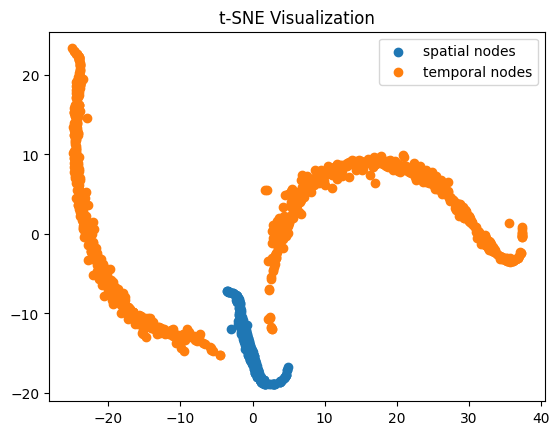

In [6]:
from torch_timeseries.experiments.bistgnnv6_experiment import BiSTGNNv6Experiment

exp = BiSTGNNv6Experiment(
    dataset_type="Traffic", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    # dataset_type="ExchangeRate",
    output_layer_type="tcn6",
    latent_dim=32,
    gcn_layers=2,
    tcn_channel=16,
    self_loop_eps=0.1,
    tcn_layers=5,
    pred_len=1,
    batch_size=32,
    horizon=24,
    data_path='../data',
    save_dir='../results',
    model_type="BiSTGNNv6",
    windows=168
)

seed = 42
exp._setup_run(seed)
exp._check_run_exist(seed)
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)
import numpy as np
s_emb = exp.model.temporal_encoder.static_node_embedding.weight
t_emb = exp.model.spatial_encoder.static_node_embedding.weight
# Concatenate s_emb and t_emb
combined_emb = np.concatenate((s_emb.detach().cpu().numpy(), t_emb.detach().cpu().numpy()), axis=0)

# Apply t-SNE to reduce dimensionality to 2 components
tsne = TSNE(n_components=2, perplexity=60, random_state=4)
combined_emb_tsne = tsne.fit_transform(combined_emb)


l = len(s_emb) # + 215

s_emb_tsne = combined_emb_tsne[:l]
t_emb_tsne = combined_emb_tsne[l:]

# Create a scatter plot
plt.scatter(s_emb_tsne[:, 0], s_emb_tsne[:, 1], label='spatial nodes')
plt.scatter(t_emb_tsne[:, 0], t_emb_tsne[:, 1], label='temporal nodes')
plt.title('t-SNE Visualization')
plt.legend()
plt.show()


In [ ]:
# 3  case study of leaned node static embeddings

# 4  case study of leaned dynamic static embeddings

## 4.1 ETTm1 24

In [39]:
device = 'cpu'
exp = HSTGNNv3Experiment(
    dataset_type="ETTm1", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    # dataset_type="ExchangeRate",
    batch_size=32,
    horizon=24,
    pred_len=1,
    data_path='../data',
    save_dir='../results/',
    windows=384,
    device=device
)

# # 42,233,666,19971203,19980224

seed = 42
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)


Using downloaded and verified file: ../data/ETTm1/ETTm1.csv
train steps: 48369
val steps: 13529
test steps: 6561
torch.get_default_dtype() torch.float32
graph_build_type dis mlpsim_direc_tt_mask
result directory exists: ../results/runs/HSTGNNv3/ETTm1/w384h24s1/4b11a17cca1647172f2f56ff64d5da15
resuming from ../results/runs/HSTGNNv3/ETTm1/w384h24s1/4b11a17cca1647172f2f56ff64d5da15/run_checkpoint.pth


In [46]:
import torch
which = 0 
batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc = exp.dataloader.train_dataset[which]
batch_x = torch.tensor(batch_x).unsqueeze(0).to(device).float()
batch_y = torch.tensor(batch_y).unsqueeze(0).to(device).float()
batch_origin_y = torch.tensor(batch_origin_y).unsqueeze(0).to(device).float()
batch_x_date_enc = torch.tensor(batch_x_date_enc).unsqueeze(0).to(device).float()
batch_y_date_enc = torch.tensor(batch_y_date_enc).unsqueeze(0).to(device).float()


exp.dataloader.train_dataset[0]
y = batch_y
x = exp.dataloader.train_dataset.scaler.inverse_transform(batch_x).transpose(1,2)

batch_x = batch_x.transpose(1,2).to(device)
pred_y = exp.model(batch_x, batch_x_date_enc)

exp.model.spatial_encoder(batch_x)

TypeError: forward() takes 2 positional arguments but 3 were given

In [51]:
exp.model.spatial_encoder(batch_x)

tensor([[[0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
          0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
          0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
          0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
          0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
          0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
          0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
          0.5000, 0.5000, 0.5000

tensor([[[-0.2241, -0.2335, -0.2335,  ...,  0.7216,  0.7121,  0.5231],
         [-0.1237, -0.0908, -0.1565,  ...,  1.8124,  1.9437,  1.7467],
         [-0.3988, -0.4144, -0.4144,  ...,  0.7148,  0.6680,  0.6368],
         ...,
         [ 0.9541,  1.0060,  0.9805,  ...,  0.0461, -0.0059, -0.0578],
         [ 0.8029,  0.9045,  0.7529,  ...,  1.8688,  1.7672,  1.8172],
         [ 2.0094,  2.0011,  1.9519,  ...,  1.5248,  1.4673,  1.5166]]])

In [48]:
exp.model.temporal_encoder(batch_x.transpose(1,2), batch_x_date_enc)


tensor([[[-1.6438e-40,  1.3298e-42,  3.2561e-41,  ..., -1.1449e-41,
          -1.1526e-40, -1.3920e-40],
         [-2.4580e-40,  3.8227e-42,  5.2400e-41,  ..., -1.9222e-41,
          -1.7640e-40, -2.0844e-40],
         [-2.8354e-40,  4.7966e-42,  5.9016e-41,  ..., -1.9346e-41,
          -2.0542e-40, -2.4120e-40],
         ...,
         [-2.0972e-40,  2.4848e-41, -6.4507e-41,  ...,  1.5967e-40,
          -2.3851e-40,  5.5018e-40],
         [-2.1037e-40,  2.6741e-41, -6.4059e-41,  ...,  1.6369e-40,
          -2.3318e-40,  5.6151e-40],
         [-2.1363e-40,  2.8651e-41, -7.0597e-41,  ...,  1.6285e-40,
          -2.3000e-40,  5.5670e-40]]], grad_fn=<TransposeBackward1>)

In [ ]:
import numpy as np
s_emb = exp.model.temporal_encoder.static_node_embedding.weight
t_emb = exp.model.spatial_encoder.static_node_embedding.weight
# Concatenate s_emb and t_emb
combined_emb = np.concatenate((s_emb.detach().cpu().numpy(), t_emb.detach().cpu().numpy()), axis=0)

# # Apply t-SNE to reduce dimensionality to 2 components
tsne = TSNE(n_components=2, perplexity=5, random_state=10)
combined_emb_tsne = tsne.fit_transform(combined_emb)

# # Separate the t-SNE results back into s_emb and t_emb

l = len(s_emb) # + 215

s_emb_tsne = combined_emb_tsne[:l]
t_emb_tsne = combined_emb_tsne[l:]

# Create a scatter plot
plt.scatter(s_emb_tsne[:, 0], s_emb_tsne[:, 1], label='spatial nodes')
plt.scatter(t_emb_tsne[:, 0], t_emb_tsne[:, 1], label='temporal nodes')
plt.title('t-SNE Visualization')
plt.legend()
plt.show()


## 4.2 ETTh1 24

### 1. Load data

In [53]:
device = 'cpu'
exp = HSTGNNv3Experiment(
    dataset_type="ETTh1", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    # dataset_type="ExchangeRate",
    batch_size=32,
    horizon=24,
    pred_len=1,
    data_path='../data',
    save_dir='../results/',
    windows=384,
    device=device
)

# # 42,233,666,19971203,19980224

seed = 42
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)


Using downloaded and verified file: ../data/ETTh1/ETTh1.csv
train steps: 11787
val steps: 3077
test steps: 1335
torch.get_default_dtype() torch.float32
graph_build_type dis mlpsim_direc_tt_mask
result directory exists: ../results/runs/HSTGNNv3/ETTh1/w384h24s1/156148894d81edfae21987572f682607
resuming from ../results/runs/HSTGNNv3/ETTh1/w384h24s1/156148894d81edfae21987572f682607/run_checkpoint.pth


In [65]:
Xs, Xt, A = get_dynamic_embed_graph(exp, 1000, device) # 1000 useful

### 2. Plot adj

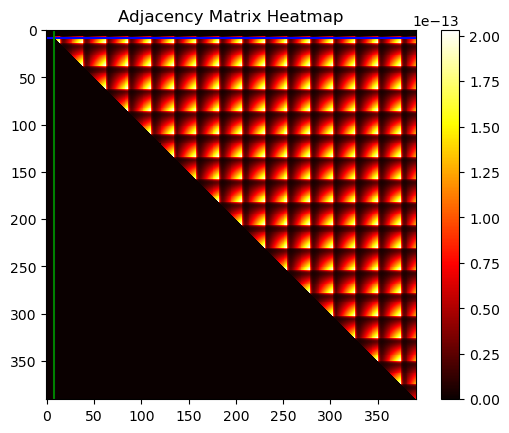

In [66]:
# 假设这是你的邻接矩阵
adj_matrix = A[0].detach().cpu().numpy()

# 使用 matplotlib 绘制热力图
plt.imshow(adj_matrix, cmap='hot', interpolation='nearest')
plt.axhline(y=8, color='blue', linestyle='-')
plt.axvline(x=8, color='green', linestyle='-')

plt.colorbar()
plt.title('Adjacency Matrix Heatmap')
plt.show()

### 3. Plot dynamic embedding

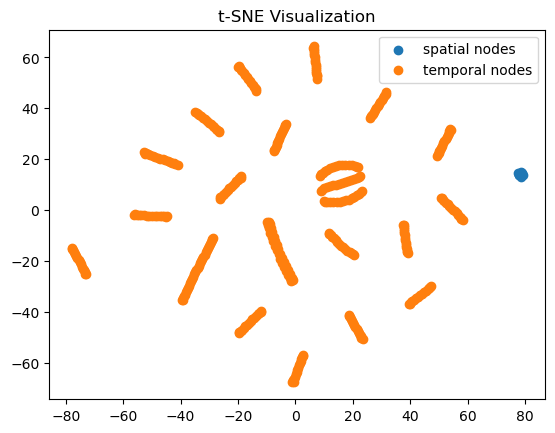

In [70]:
import numpy as np
s_emb = exp.model.spatial_encoder.static_node_embedding.weight
t_emb = exp.model.temporal_encoder.static_node_embedding.weight
# Concatenate s_emb and t_emb
combined_emb = np.concatenate((Xs[0].detach().cpu().numpy(), Xt[0].detach().cpu().numpy()), axis=0)
# # Apply t-SNE to reduce dimensionality to 2 components
tsne = TSNE(n_components=2, perplexity=5, random_state=10)
combined_emb_tsne = tsne.fit_transform(combined_emb)

# # Separate the t-SNE results back into s_emb and t_emb

l = len(s_emb) # + 215

s_emb_tsne = combined_emb_tsne[:l]
t_emb_tsne = combined_emb_tsne[l:]

# Create a scatter plot
plt.scatter(s_emb_tsne[:, 0], s_emb_tsne[:, 1], label='spatial nodes')
plt.scatter(t_emb_tsne[:, 0], t_emb_tsne[:, 1], label='temporal nodes')
plt.title('t-SNE Visualization')
plt.legend()
plt.show()


### 3. Plot big dynamic embedding

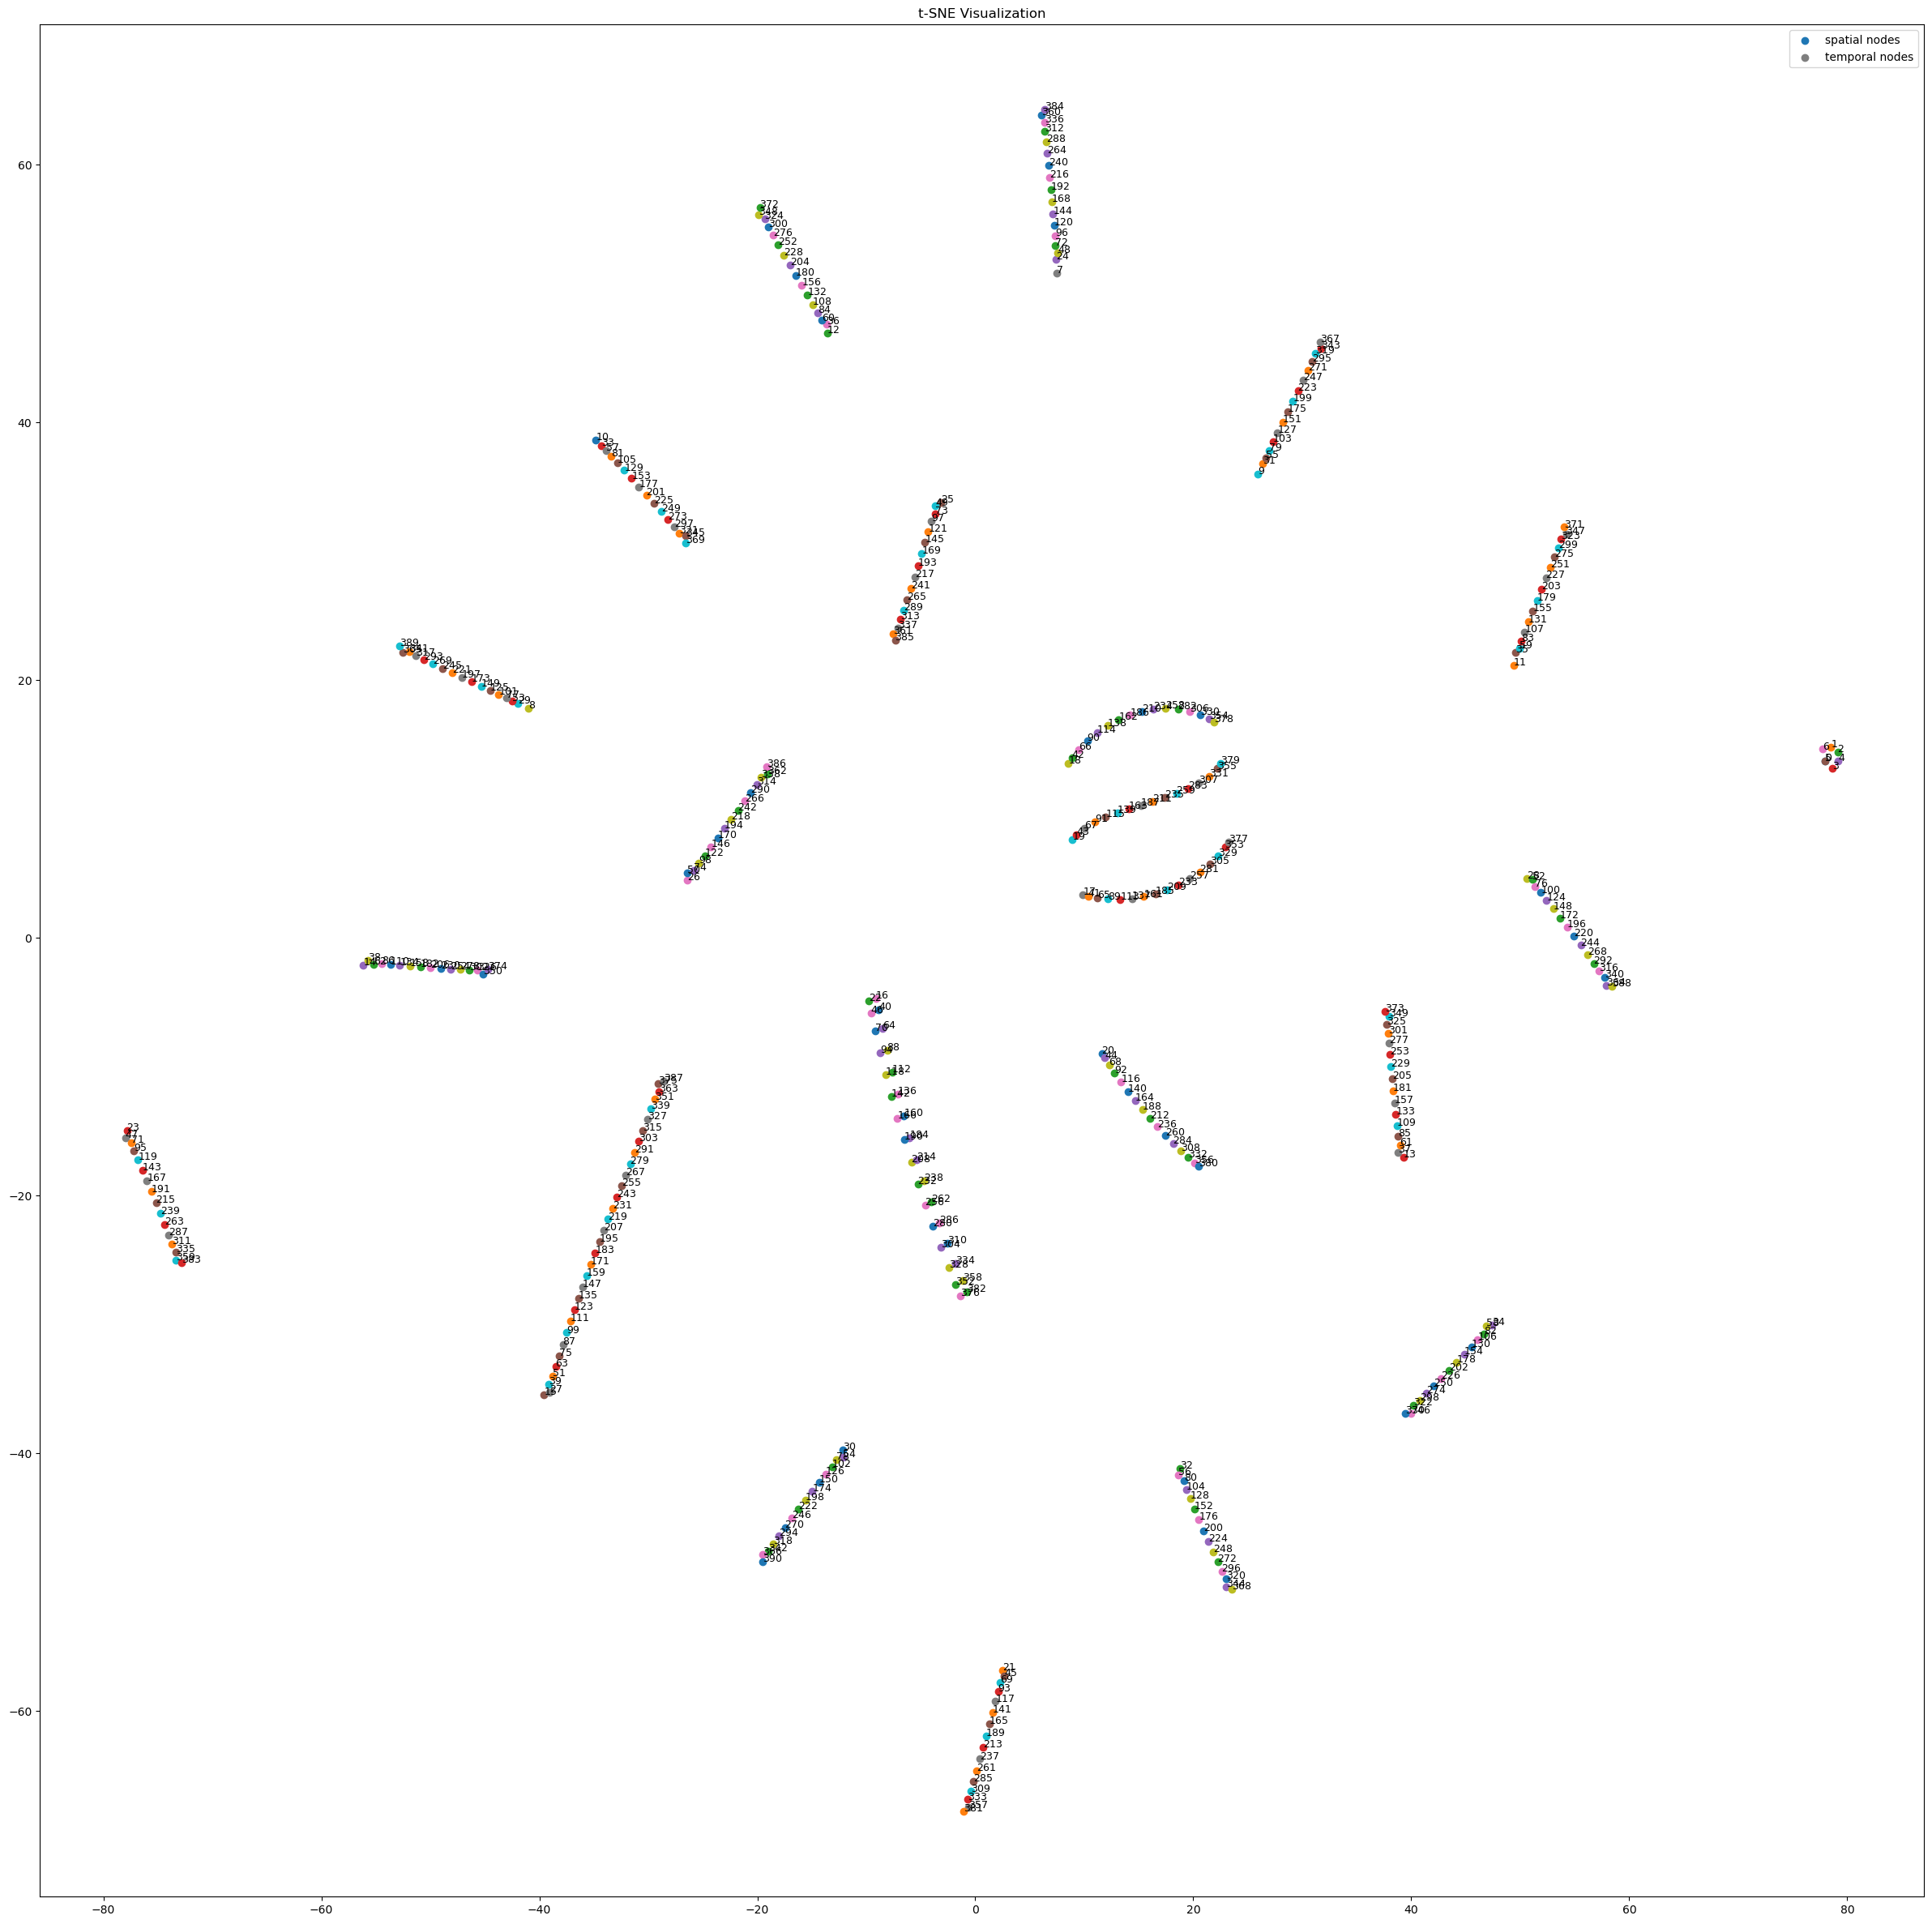

In [98]:
# Separating the t-SNE results
l = len(s_emb)
s_emb_tsne = combined_emb_tsne[:l]
t_emb_tsne = combined_emb_tsne[l:]
plt.figure(figsize=(30, 30))  # You can adjust the size here

# Create a scatter plot and annotate each point with its index
for i, (x, y) in enumerate(s_emb_tsne):
    plt.scatter(x, y, label='spatial nodes' if i == 0 else "")
    plt.text(x, y, str(i), fontsize=9)  # Annotate spatial nodes

for i, (x, y) in enumerate(t_emb_tsne, start=l):
    plt.scatter(x, y, label='temporal nodes' if i == l else "")
    plt.text(x, y, str(i), fontsize=9)  # Annotate temporal nodes

plt.title('t-SNE Visualization')
plt.legend()
plt.show()


### plot data

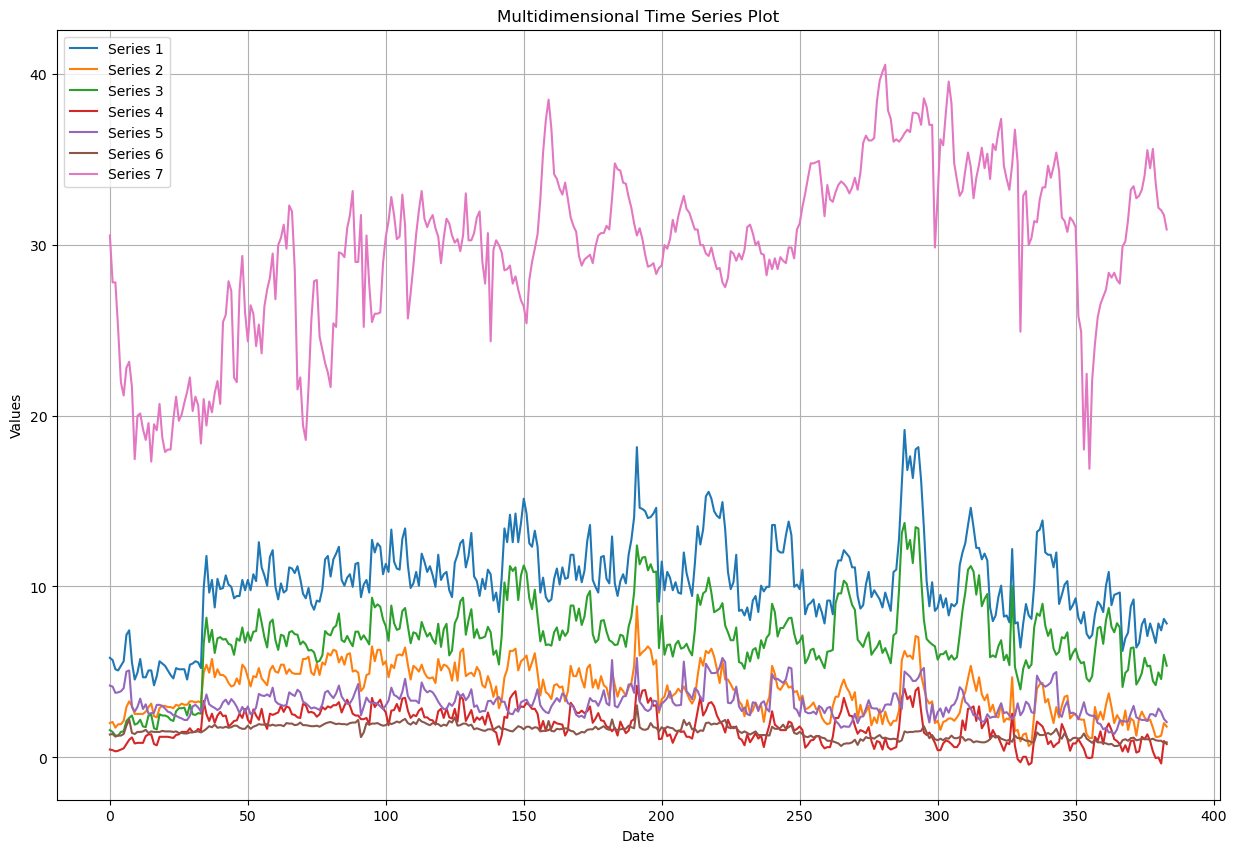

In [96]:
# x = exp.dataloader.train_dataset.scaler.inverse_transform(batch_x).transpose(1,2)
batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc = exp.dataloader.train_dataset[which]
x = exp.dataloader.train_dataset.scaler.inverse_transform(batch_x)
original_x = x.transpose(1, 0)
# 创建多维时序图
plt.figure(figsize=(15, 10))
N = original_x.shape[0]
# 绘制每个维度的时序数据
for i in range(N):
    plt.plot(original_x[i, :], label=f'Series {i+1}')
plt.title('Multidimensional Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

In [83]:
batch_x.shape

(384, 7)

In [73]:
x = exp.dataloader.train_dataset.scaler.inverse_transform(batch_x).transpose(1,2)
original_x = x[0].detach().cpu().numpy()

RuntimeError: The size of tensor a (384) must match the size of tensor b (7) at non-singleton dimension 2

Xs.shape

## 4.3 ETTm2 24

In [2]:
device = 'cpu'
exp = HSTGNNv3Experiment(
    dataset_type="ETTm2", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    # dataset_type="ExchangeRate",
    batch_size=32,
    horizon=24,
    pred_len=1,
    data_path='../data',
    save_dir='../results/',
    windows=384,
    device=device
)

# # 42,233,666,19971203,19980224

seed = 42
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)
which = 46000

Using downloaded and verified file: ../data/ETTm2/ETTm2.csv
train steps: 48369
val steps: 13529
test steps: 6561
torch.get_default_dtype() torch.float32
graph_build_type dis mlpsim_direc_tt_mask
result directory exists: ../results/runs/HSTGNNv3/ETTm2/w384h24s1/8712f606bfaf3873875dfe16173c50e4
resuming from ../results/runs/HSTGNNv3/ETTm2/w384h24s1/8712f606bfaf3873875dfe16173c50e4/run_checkpoint.pth


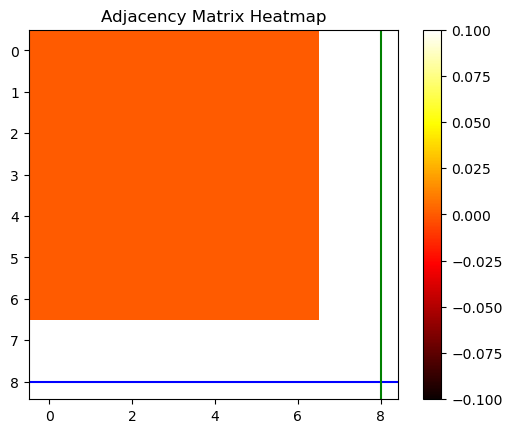

In [4]:
Xs, Xt, A = get_dynamic_embed_graph(exp, which, device) # 1000 useful
# 假设这是你的邻接矩阵
adj_matrix = A[0].detach().cpu().numpy()

# 使用 matplotlib 绘制热力图
plt.imshow(adj_matrix[:7, :7], cmap='hot', interpolation='nearest')
plt.axhline(y=8, color='blue', linestyle='-')
plt.axvline(x=8, color='green', linestyle='-')

plt.colorbar()
plt.title('Adjacency Matrix Heatmap')
plt.show()

In [111]:
adj_matrix[:7, :7]

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.4872e-41, 2.4872e-41,
         2.4872e-41],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.4872e-41, 2.4872e-41,
         2.4872e-41],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.4872e-41, 2.4872e-41,
         2.4872e-41],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]], grad_fn=<SelectBackward0>)

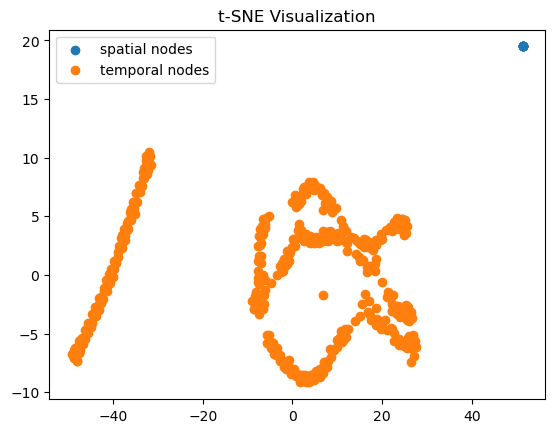

In [105]:
import numpy as np
s_emb = exp.model.spatial_encoder.static_node_embedding.weight
t_emb = exp.model.temporal_encoder.static_node_embedding.weight
# Concatenate s_emb and t_emb
combined_emb = np.concatenate((Xs[0].detach().cpu().numpy(), Xt[0].detach().cpu().numpy()), axis=0)
# # Apply t-SNE to reduce dimensionality to 2 components
tsne = TSNE(n_components=2, perplexity=5, random_state=10)
combined_emb_tsne = tsne.fit_transform(combined_emb)

# # Separate the t-SNE results back into s_emb and t_emb

l = len(s_emb) # + 215

s_emb_tsne = combined_emb_tsne[:l]
t_emb_tsne = combined_emb_tsne[l:]

# Create a scatter plot
plt.scatter(s_emb_tsne[:, 0], s_emb_tsne[:, 1], label='spatial nodes')
plt.scatter(t_emb_tsne[:, 0], t_emb_tsne[:, 1], label='temporal nodes')
plt.title('t-SNE Visualization')
plt.legend()
plt.show()


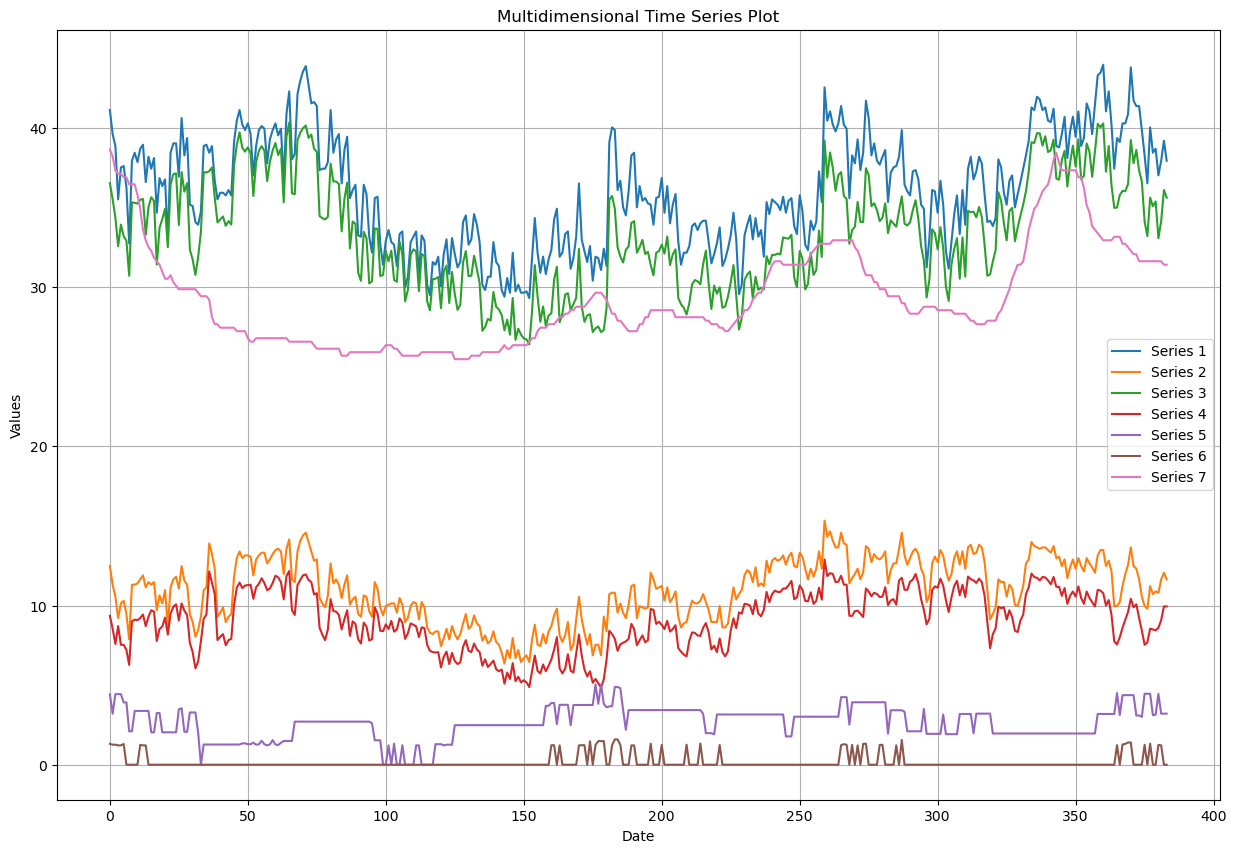

In [106]:
batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc = exp.dataloader.train_dataset[which]
x = exp.dataloader.train_dataset.scaler.inverse_transform(batch_x)
original_x = x.transpose(1, 0)
# 创建多维时序图
plt.figure(figsize=(15, 10))
N = original_x.shape[0]
# 绘制每个维度的时序数据
for i in range(N):
    plt.plot(original_x[i, :], label=f'Series {i+1}')
plt.title('Multidimensional Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

## 4.4 ETTh2 24

## 4.5 ExchangeRate

In [2]:
device = 'cpu'
exp = HSTGNNv3Experiment(
    dataset_type="ExchangeRate", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    # dataset_type="ExchangeRate",
    batch_size=32,
    horizon=24,
    pred_len=1,
    data_path='../data',
    save_dir='../results/',
    windows=96,
    device=device
)

# # 42,233,666,19971203,19980224

seed = 42
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)
which = 0

NameError: name 'HSTGNNv7Experiment' is not defined

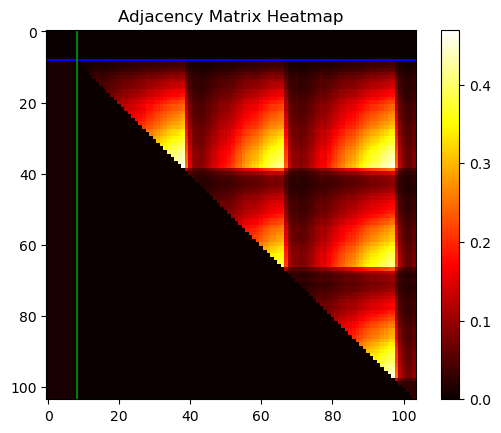

In [13]:
Xs, Xt, A = get_dynamic_embed_graph(exp, which, device) # 1000 useful

plot_adj(A)

In [15]:
Xs

tensor([[[0.5000, 0.5000, 0.5000, 0.4975, 0.5000, 0.5000, 0.5000, 0.5048,
          0.5002, 0.4999, 0.4983, 0.5000, 0.5000, 0.5000, 0.5000, 0.5016],
         [0.5000, 0.5000, 0.5000, 0.4975, 0.5000, 0.5000, 0.5000, 0.5048,
          0.5002, 0.4999, 0.4983, 0.5000, 0.5000, 0.5000, 0.5000, 0.5016],
         [0.5000, 0.5000, 0.5000, 0.4975, 0.5000, 0.5000, 0.5000, 0.5048,
          0.5002, 0.4999, 0.4983, 0.5000, 0.5000, 0.5000, 0.5000, 0.5016],
         [0.5000, 0.5000, 0.5000, 0.4975, 0.5000, 0.5000, 0.5000, 0.5048,
          0.5002, 0.4999, 0.4983, 0.5000, 0.5000, 0.5000, 0.5000, 0.5016],
         [0.5000, 0.5000, 0.5000, 0.4975, 0.5000, 0.5000, 0.5000, 0.5048,
          0.5002, 0.4999, 0.4983, 0.5000, 0.5000, 0.5000, 0.5000, 0.5016],
         [0.5000, 0.5000, 0.5000, 0.4975, 0.5000, 0.5000, 0.5000, 0.5048,
          0.5002, 0.4999, 0.4983, 0.5000, 0.5000, 0.5000, 0.5000, 0.5016],
         [0.5000, 0.5000, 0.5000, 0.4975, 0.5000, 0.5000, 0.5000, 0.5048,
          0.5002, 0.4999, 0.4983

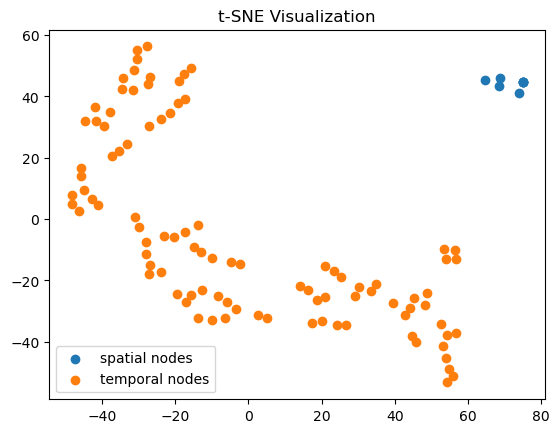

In [137]:
plot_dynamic_embedding(Xs, Xt, exp)

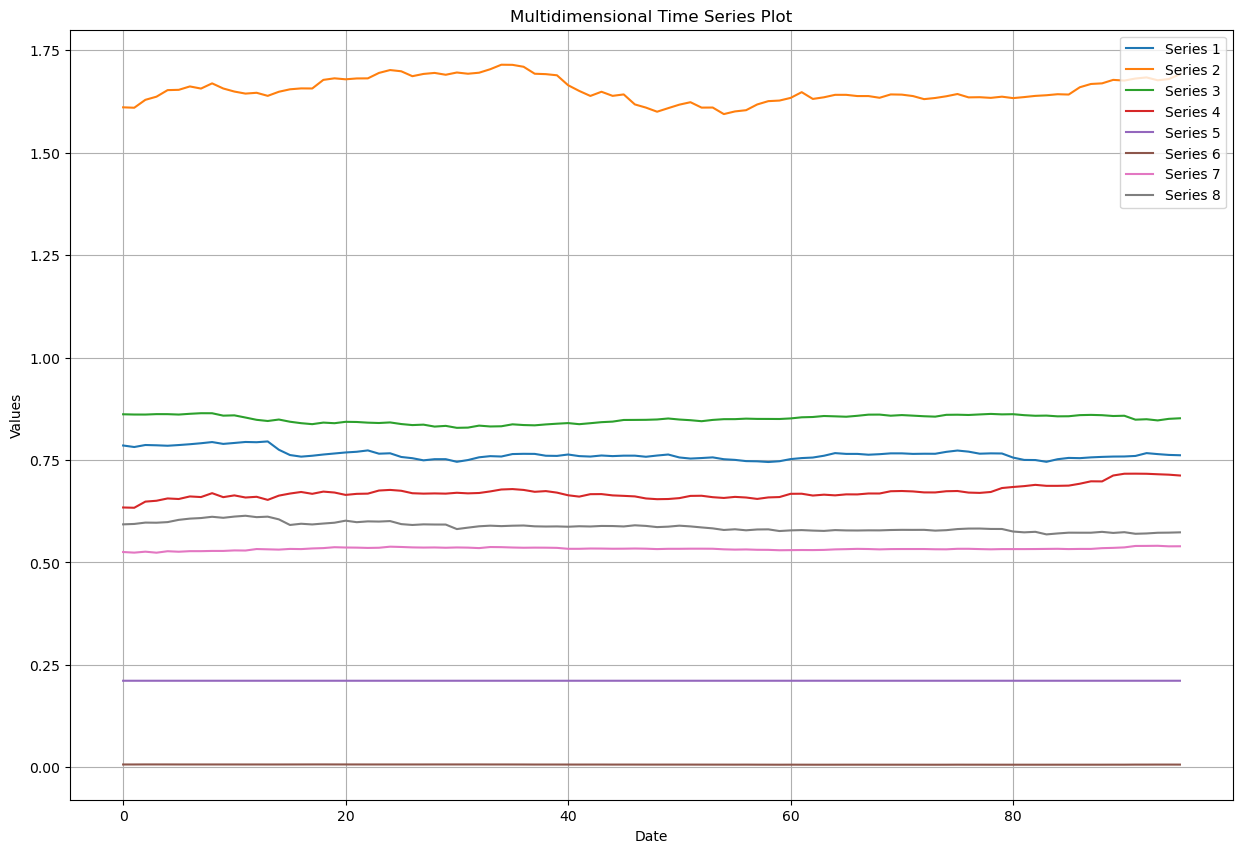

In [140]:
plot_window(exp, which)

## 4.6 ILI

In [7]:
device = 'cpu'
exp = HSTGNNv3Experiment(
    dataset_type="ILI", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    # dataset_type="ExchangeRate",
    batch_size=32,
    horizon=24,
    pred_len=1,
    data_path='../data',
    save_dir='../results/',
    windows=48,
    device=device
)

# # 42,233,666,19971203,19980224
which = 0
seed = 42
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)


Using downloaded and verified file: ../data/ILI/illness.zip
Extracting ../data/ILI/illness.zip to ../data/ILI
train steps: 605
val steps: 122
test steps: 26
torch.get_default_dtype() torch.float32
graph_build_type dis mlpsim_direc_tt_mask
result directory exists: ../results/runs/HSTGNNv3/ILI/w48h24s1/16ab387658a5110103efe1176d54b979
resuming from ../results/runs/HSTGNNv3/ILI/w48h24s1/16ab387658a5110103efe1176d54b979/run_checkpoint.pth


In [11]:
Xt

tensor([[[ 2.3579e-01, -4.4870e-02, -4.2537e-02,  4.2994e-02, -1.8171e-01,
          -2.5705e-01, -9.1249e-04, -3.6376e-02,  3.8542e-01,  2.4197e-01,
          -1.2879e-01,  2.6274e-01, -1.3771e-01,  4.5423e-01, -1.6338e-01,
           7.0709e-02],
         [-9.5182e-02, -2.4197e-01,  2.1738e-01,  1.7880e-01,  2.9025e-01,
          -2.8056e-02, -2.7812e-01, -3.7676e-02,  4.2453e-02,  1.7601e-01,
          -5.9852e-01, -1.2537e-02, -6.2202e-01,  3.2087e-01, -7.0438e-01,
           4.3752e-01],
         [-2.5039e-01, -4.4068e-01, -1.6380e-01,  2.0190e-01,  5.4099e-01,
          -3.4776e-03, -4.1945e-01,  8.7990e-02, -2.1003e-01,  1.4955e-01,
          -7.4219e-01, -8.5660e-02, -9.2842e-01,  3.6415e-01, -9.6167e-01,
           7.4301e-01],
         [-2.9092e-01, -6.0767e-01, -2.4613e-01,  2.1025e-01,  6.9558e-01,
          -1.8373e-01, -5.1863e-01,  7.8162e-01, -5.1085e-01,  1.9822e-01,
          -9.3260e-01, -1.2207e-01, -9.8680e-01,  3.7473e-01, -9.9799e-01,
           8.0240e-01],
    

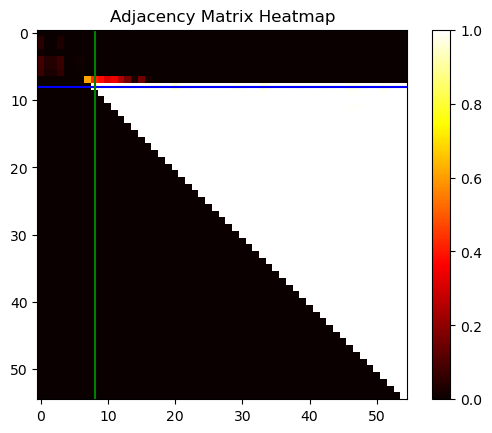

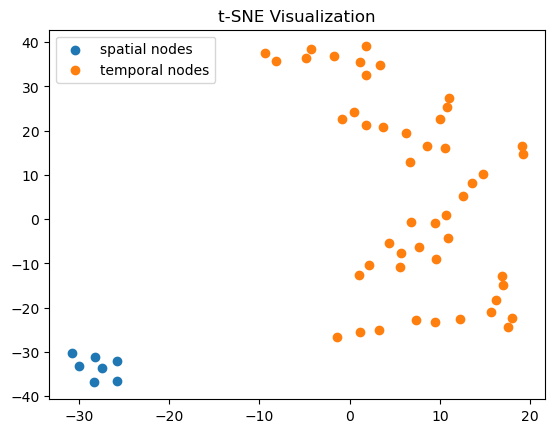

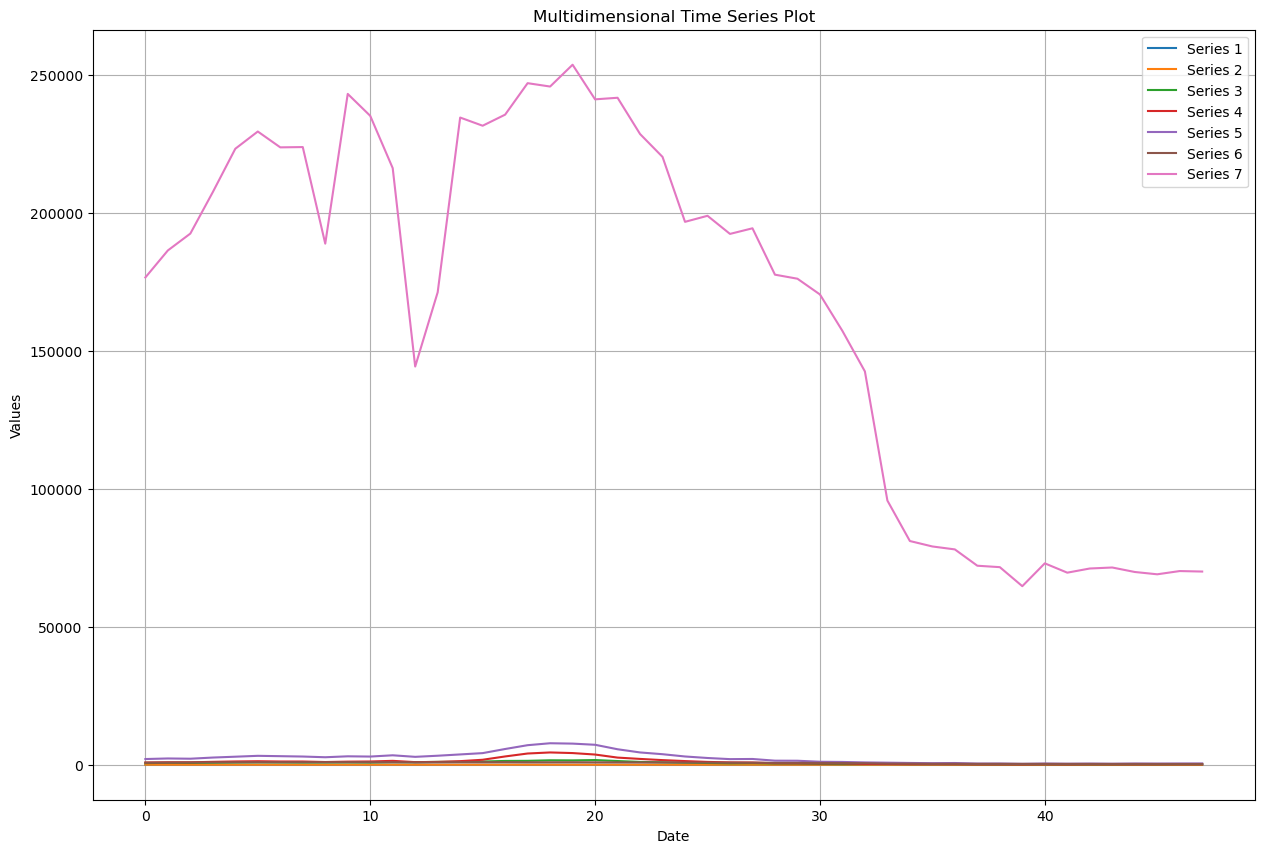

In [8]:
Xs, Xt, A = get_dynamic_embed_graph(exp, which, device) # 0 useful 

plot_adj(A)
plot_dynamic_embedding(Xs, Xt, exp)
plot_window(exp, which)

## 4.5 SP500

In [150]:
device = 'cpu'
exp = HSTGNNv3Experiment(
    dataset_type="SP500", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    # dataset_type="ExchangeRate",
    batch_size=32,
    horizon=24,
    pred_len=1,
    data_path='../data',
    save_dir='../results/',
    windows=40,
    device=device
)

# # 42,233,666,19971203,19980224
seed = 42
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)
    

train steps: 1325
val steps: 333
test steps: 137
torch.get_default_dtype() torch.float32
graph_build_type dis mlpsim_direc_tt_mask
result directory exists: ../results/runs/HSTGNNv3/SP500/w40h24s1/d788775859739206391cc6acd4dd0dc0
resuming from ../results/runs/HSTGNNv3/SP500/w40h24s1/d788775859739206391cc6acd4dd0dc0/run_checkpoint.pth


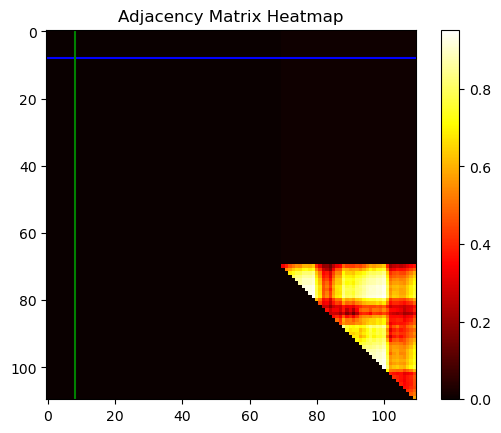

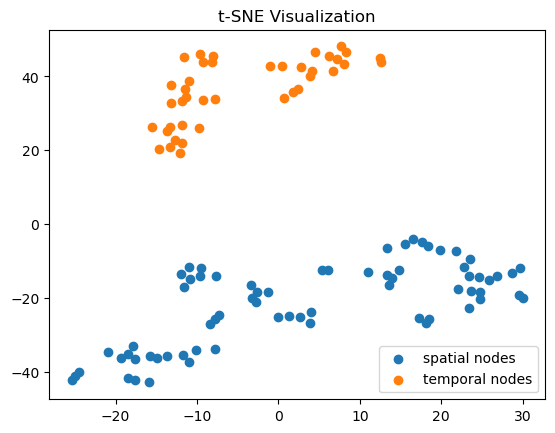

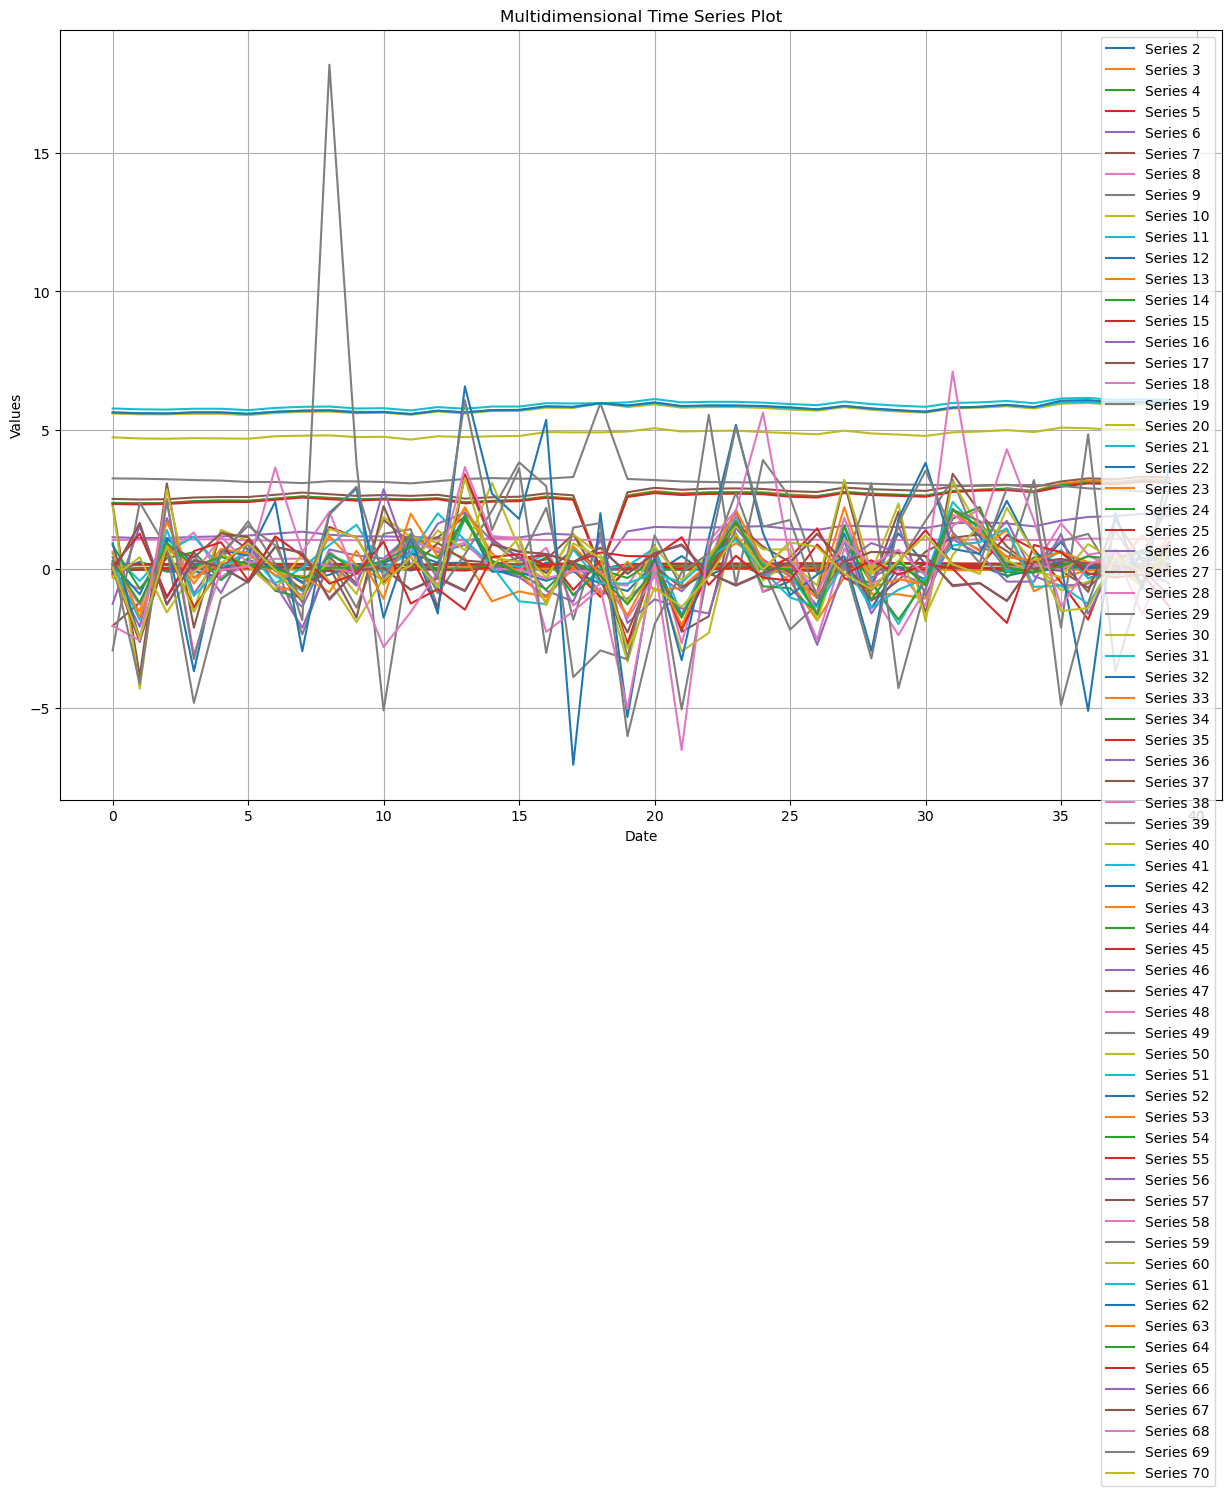

In [153]:

which = 200
Xs, Xt, A = get_dynamic_embed_graph(exp, which, device) # 0 useful 

plot_adj(A)
plot_dynamic_embedding(Xs, Xt, exp)
plot_window_exclude(exp, which, exclude=[0])

## 4.5 Electricity

## 4.5 Weather

In [41]:
from torch_timeseries.experiments.hstgnn_experimentv7 import HSTGNNv7Experiment


device = 'cpu'
exp = HSTGNNv3Experiment(
    dataset_type="Weather", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    # dataset_type="ExchangeRate",
    batch_size=32,
    horizon=24,
    pred_len=1,
    data_path='../data',
    save_dir='../results/',
    windows=168,
    device=device,
)

# # 42,233,666,19971203,19980224
seed = 42
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)
    

Using downloaded and verified file: ../data/weather/weather.zip
Extracting ../data/weather/weather.zip to ../data/weather
train steps: 36696
val steps: 10348
test steps: 5079
torch.get_default_dtype() torch.float32
graph_build_type dis mlpsim_direc_tt_mask
result directory exists: ../results/runs/HSTGNNv3/Weather/w168h24s1/04f13e9b29523baf51ea95c7a98ad7fc
resuming from ../results/runs/HSTGNNv3/Weather/w168h24s1/04f13e9b29523baf51ea95c7a98ad7fc/run_checkpoint.pth


In [1]:
import torch
import torch.nn.functional as F

def gumbel_softmax(logits, temperature=1.0, hard=False):
    """
    Gumbel Softmax采样函数

    参数:
        logits: 模型输出的logits，形状为 [batch_size, num_categories]
        temperature: Gumbel分布的温度参数，控制采样的"硬度"，温度越高越接近均匀分布，温度越低越接近argmax
        hard: 如果为True，采样结果将是一个one-hot向量，否则将是一个分布概率的采样

    返回:
        采样结果，形状与logits相同
    """
    gumbel_noise = -torch.log(-torch.log(torch.rand_like(logits) + 1e-20) + 1e-20)  # 从Gumbel(0, 1)分布中采样噪声
    gumbel_logits = (logits + gumbel_noise) / temperature  # 添加Gumbel噪声并除以温度
    soft_sample = F.softmax(gumbel_logits, dim=-1)  # 对加噪声后的logits进行softmax操作

    if hard:
        # 如果需要硬采样，则将soft采样结果变为one-hot形式
        hard_sample = torch.argmax(soft_sample, dim=-1, keepdim=True)
        soft_sample = torch.zeros_like(soft_sample).scatter_(-1, hard_sample, 1.0)
        return hard_sample
    else:
        return soft_sample

# 示例用法：
logits = torch.tensor([[1.0, 2.0, 3.0]])
sample = gumbel_softmax(logits, temperature=0.5, hard=True)
print("Hard Sample:", sample)
sample = gumbel_softmax(logits, temperature=0.5, hard=False)
print("Soft Sample:", sample)


Hard Sample: tensor([[0]])
Soft Sample: tensor([[0.6997, 0.2010, 0.0994]])


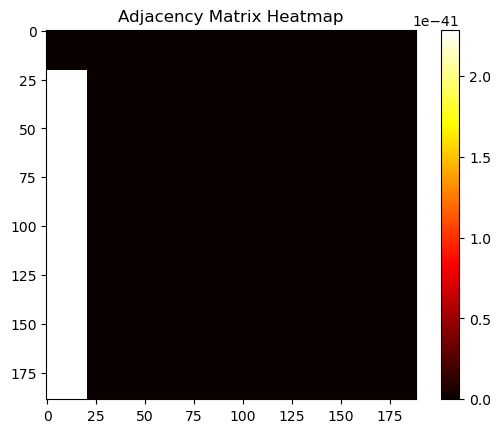

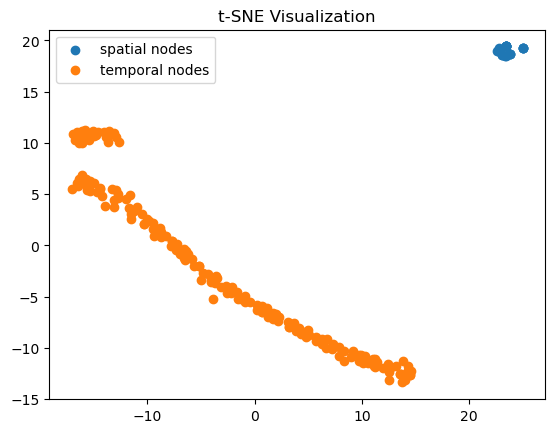

In [42]:

which = 0
Xs, Xt, A = get_dynamic_embed_graph(exp, which, device) # 0 useful 
adj_matrix = A[0].detach().cpu().numpy()

# 使用 matplotlib 绘制热力图
plt.imshow(adj_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Adjacency Matrix Heatmap')
plt.show()
# plot_adj(A)
plot_dynamic_embedding(Xs, Xt, exp)
# plot_window_exclude(exp, which)

## 4.6 Traffic

### 12

In [47]:
from torch_timeseries.experiments.hstgnn_experimentv7 import HSTGNNv7Experiment


device = 'cpu'
exp = HSTGNNv3Experiment(
    dataset_type="Traffic", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    # dataset_type="ExchangeRate",
    batch_size=16,
    horizon=3,
    pred_len=1,
    data_path='../data',
    save_dir='../results/',
    windows=168,
    device=device,
    # latent_dim=32,
    # normalization=False,
)

# # 42,233,666,19971203,19980224
seed = 42
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)
    

Using downloaded and verified file: ../data/traffic/traffic.txt.gz
Extracting ../data/traffic/traffic.txt.gz to ../data/traffic
train steps: 12110
val steps: 3338
test steps: 1586
torch.get_default_dtype() torch.float32
graph_build_type dis mlpsim_direc_tt_mask
result directory exists: ../results/runs/HSTGNNv3/Traffic/w168h3s1/4cadb0f3008a512b95aefa253d438132
resuming from ../results/runs/HSTGNNv3/Traffic/w168h3s1/4cadb0f3008a512b95aefa253d438132/run_checkpoint.pth


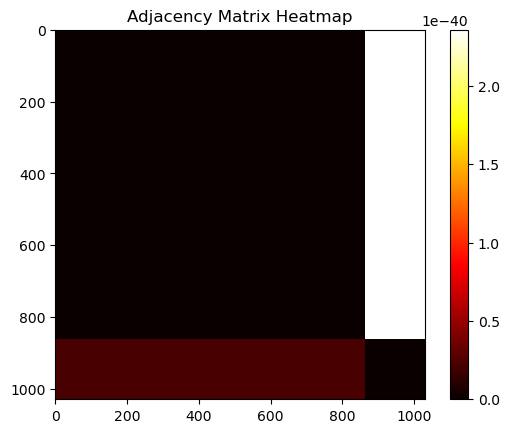

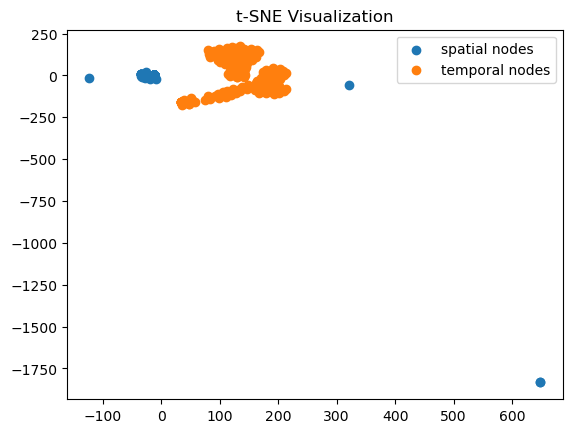

In [55]:

which = 5000
Xs, Xt, A = get_dynamic_embed_graph(exp, which, device) # 0 useful 
adj_matrix = A[0].detach().cpu().numpy()

# 使用 matplotlib 绘制热力图
plt.imshow(adj_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Adjacency Matrix Heatmap')
plt.show()
# plot_adj(A)
plot_dynamic_embedding(Xs, Xt, exp)
# plot_window_exclude(exp, which)

In [57]:
Xs

tensor([[[0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         ...,
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000]]],
       grad_fn=<SigmoidBackward0>)

## 4.7 METR-LA

### 1. 3

In [15]:
from torch_timeseries.experiments.hstgnn_experimentv7 import HSTGNNv7Experiment


device = 'cuda:0'
exp = HSTGNNv7Experiment(
    dataset_type="METR_LA", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    # dataset_type="ExchangeRate",
    batch_size=32,
    horizon=1,
    graph_build_type="predefined_adaptive", # mlpsim_direc_tt_mask
    gcn_type='weighted_han_update3',
    invtrans_loss=True,
    pred_len=12,
    data_path='../data',
    save_dir='../results/',
    windows=12,
    device=device,
)

# # 42,233,666,19971203,19980224
seed = 42
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)

# exp._resume_from('/notebooks/pytorch_timeseries/results/runs/BiSTGNNv6/METR_LA/w12h1s12/0befc310f4ef0507b86d6f22fefc633c')

train steps: 23967
val steps: 6831
test steps: 3405
torch.get_default_dtype() torch.float32
result directory exists: ../results/runs/HSTGNNv7/METR_LA/w12h1s12/232339c35c2c84221da6c685e2521588
resuming from ../results/runs/HSTGNNv7/METR_LA/w12h1s12/232339c35c2c84221da6c685e2521588/run_checkpoint.pth


In [13]:
exp.run(seed)


torch.get_default_dtype() torch.float32
result directory exists: ../results/runs/HSTGNNv7/METR_LA/w12h1s12/19472fb3de08a4d93d020d3c94a0ac8e
run : 0 in seed: 42
+----------------------------------------------------------------+------------+
|                            Modules                             | Parameters |
+----------------------------------------------------------------+------------+
|          spatial_encoder.static_node_embedding.weight          |    3312    |
|          spatial_encoder.spatial_projection.0.weight           |    896     |
|           spatial_encoder.spatial_projection.0.bias            |     32     |
|          spatial_encoder.spatial_projection.2.weight           |    1024    |
|           spatial_encoder.spatial_projection.2.bias            |     32     |
|         temporal_encoder.static_node_embedding.weight          |    192     |
|       temporal_encoder.temporal_projection.weight_ih_l0        |   21792    |
|       temporal_encoder.temporal_projec

  0%|          | 0/23967 [00:00<?, ?it/s]

  0%|          | 0/23967 [00:01<?, ?it/s]


AttributeError: 'TNModule' object has no attribute 'graph_constructor'

In [10]:
batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc = exp.dataloader.train_dataset[which]
batch_x = torch.tensor(batch_x).unsqueeze(0).to(device).float()
batch_y = torch.tensor(batch_y).unsqueeze(0).to(device).float()
batch_origin_y = torch.tensor(batch_origin_y).unsqueeze(0).to(device).float()
batch_x_date_enc = torch.tensor(batch_x_date_enc).unsqueeze(0).to(device).float()
batch_y_date_enc = torch.tensor(batch_y_date_enc).unsqueeze(0).to(device).float()

exp.dataloader.train_dataset[0]
y = batch_y
x = exp.dataloader.train_dataset.scaler.inverse_transform(batch_x).transpose(1,2)
batch_x = batch_x.transpose(1,2).to(device)



In [12]:


# pred_y = exp.model(batch_x, batch_x_date_enc)
Xs = exp.model.spatial_encoder(batch_x)
Xt = exp.model.temporal_encoder(batch_x.transpose(1,2), batch_x_date_enc)
# X = torch.concat([Xs, Xt], dim=1)  # (B, N+T, latent_dim)
A, edge_index, edge_weight = exp.model.tn_modules[0].graph_constructor(Xs, Xt)



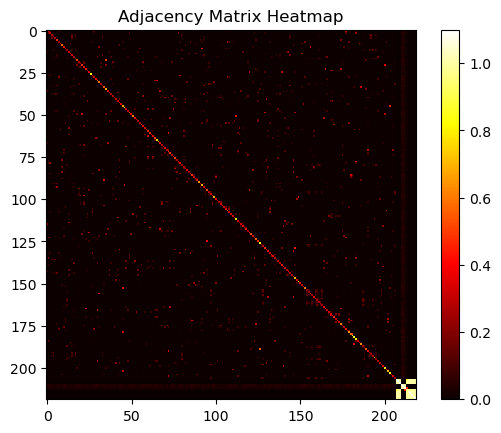

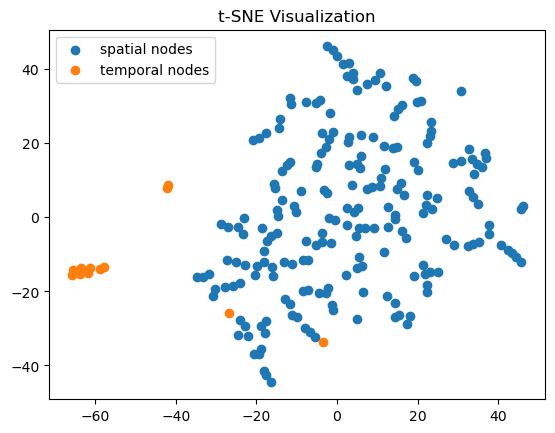

In [16]:
# 
which = 0
Xs, Xt, A = get_dynamic_embed_graph(exp, which, device) # 0 useful 
adj_matrix = A[0].detach().cpu().numpy()
# plot_adj(adj_matrix[:-12, -12:])
plt.imshow(adj_matrix, cmap='hot', interpolation='nearest')

plt.colorbar()
plt.title('Adjacency Matrix Heatmap')
plt.show()

# adj[0].detach().cpu().numpy()
plot_dynamic_embedding(Xs, Xt, exp)
# plot_window_exclude(exp, which, exclude=[0])

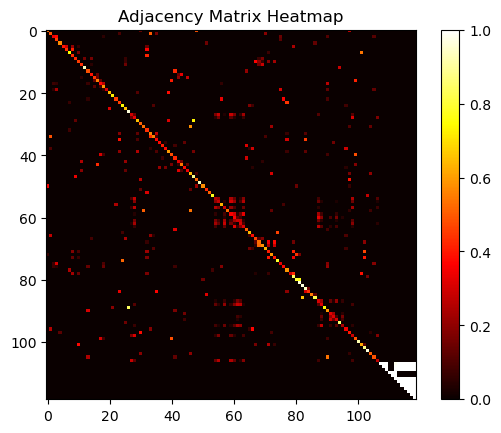

In [10]:
plt.imshow(adj_matrix[100:, 100:], cmap='hot', interpolation='nearest')

plt.colorbar()
plt.title('Adjacency Matrix Heatmap')
plt.show()

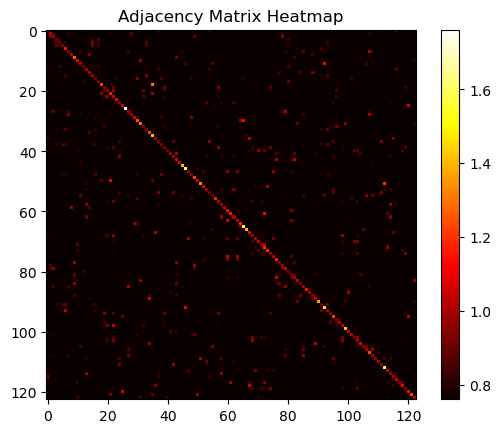

In [6]:
N = Xs.shape[1]
plt.imshow(adj_matrix[:123, :123], cmap='hot', interpolation='nearest')

plt.colorbar()
plt.title('Adjacency Matrix Heatmap')
plt.show()


In [65]:
torch.tensor(adj_matrix[N:, N:])/ torch.max(torch.tensor(adj_matrix[N:, N:]))

tensor([[0.0000, 0.6886, 0.0000, 0.0000, 0.0000, 0.5538, 0.6296, 0.0000, 0.0000,
         0.6873, 0.6923, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.4226, 0.2524, 0.5063, 0.0000, 0.6953, 0.0000,
         0.0000, 0.7375, 0.7335],
        [0.0000, 0.0000, 0.7592, 0.0000, 0.0000, 0.0000, 0.0000, 0.7063, 0.0000,
         0.0000, 0.7516, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.9722, 0.9956, 0.9332, 0.7762, 0.0000, 0.5300,
         0.4743, 0.0000, 0.4562],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.9799, 0.8166, 0.5490, 0.0000,
         0.0000, 0.0000, 0.2919],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.8869, 0.7523, 0.0000, 0.0000,
         0.0000, 0.0000, 0.5373],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6872, 0.6709,
         0.6589, 0.6533, 0.6549],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7086,
         0.7082, 0.0000, 0.7074],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7217,

In [62]:
Xs.shape

torch.Size([1, 207, 32])

In [102]:
Xt

tensor([[[ 0.4315,  0.4540, -0.2048,  0.3415, -0.0984,  0.1554, -0.1586,
           0.0514,  0.6054,  0.6500,  0.0293, -0.2954,  0.0648,  0.5165,
          -0.1391,  0.2703, -0.2355,  0.1241,  0.4969, -0.0339, -0.0190,
           0.4121, -0.1290, -0.2420, -0.2364,  0.3630, -0.5077, -0.2384,
          -0.2733,  0.2740,  0.4664,  0.3165],
         [-0.0426,  0.5944, -0.3670,  0.0926, -0.0135,  0.0974, -0.2766,
           0.1085,  0.1791,  0.6255,  0.3430, -0.3108, -0.0992,  0.6201,
          -0.3487,  0.3186, -0.4448,  0.1133,  0.6954, -0.0079, -0.5277,
           0.6513,  0.4277, -0.3708, -0.1467,  0.6866, -0.7396, -0.6648,
           0.2012,  0.1717,  0.5038,  0.5689],
         [-0.5302,  0.6809, -0.3779, -0.0759,  0.0719, -0.1320, -0.2157,
           0.5427,  0.6231,  0.2311,  0.7955,  0.2319, -0.2230,  0.6361,
          -0.4274,  0.5495, -0.2418,  0.2264,  0.6490,  0.0165, -0.1613,
           0.7206,  0.1270, -0.4730, -0.0876,  0.8423, -0.8261, -0.5240,
          -0.1211,  0.3638,  0

In [176]:
A 

tensor([[[0.4071, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.5194, 0.1832,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.3350, 0.4160,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
       grad_fn=<AddBackward0>)

## 4.5 ExchangeRate

In [173]:
# which = 15000
# Xs, Xt, A = get_dynamic_embed_graph(exp, which, device) # 0 useful 
# plot_adj(A)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (862x16 and 184x16)

### 1. ExchangeRate

In [26]:
from torch_timeseries.experiments.bistgnnv6_experiment import BiSTGNNv6Experiment

device = 'cuda:5'
exp = BiSTGNNv6Experiment(
    dataset_type="ExchangeRate", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    # dataset_type="ExchangeRate",
    output_layer_type="tcn6",
    latent_dim=32,
    gcn_layers=2,
    tcn_channel=16,
    self_loop_eps=0.5,
    tcn_layers=3,
    pred_len=1,
    batch_size=32,
    horizon=24,
    data_path='../data',
    save_dir='../results',
    model_type="BiSTGNNv6",
    windows=96,
    device=device
)

seed = 42
exp._setup_run(seed)
# exp._check_run_exist(seed)
# exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)


Using downloaded and verified file: ../data/exchange_rate/exchange_rate.csv
train steps: 5192
val steps: 1398
test steps: 641
torch.get_default_dtype() torch.float32
delete d0
result directory exists: ../results/runs/BiSTGNNv6/ExchangeRate/w96h24s1/a609cfbec5d6a0bd8e06930489db5d29
resuming from ../results/runs/BiSTGNNv6/ExchangeRate/w96h24s1/a609cfbec5d6a0bd8e06930489db5d29/run_checkpoint.pth


In [76]:
import torch

# 670 发生异常 0正常
which = 670 

batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc = exp.dataloader.train_dataset[which]
batch_x = torch.tensor(batch_x).unsqueeze(0).to(device).float()
batch_y = torch.tensor(batch_y).unsqueeze(0).to(device).float()
batch_origin_y = torch.tensor(batch_origin_y).unsqueeze(0).to(device).float()
batch_x_date_enc = torch.tensor(batch_x_date_enc).unsqueeze(0).to(device).float()
batch_y_date_enc = torch.tensor(batch_y_date_enc).unsqueeze(0).to(device).float()


exp.dataloader.train_dataset[0]
y = batch_y
x = exp.dataloader.train_dataset.scaler.inverse_transform(batch_x).transpose(1,2)

batch_x = batch_x.transpose(1,2).to(device)
pred_y = exp.model(batch_x, batch_x_date_enc)

In [77]:
# 图卷积之后的node embedding
# x = batch_x
Xs = exp.model.spatial_encoder(batch_x)
Xt = exp.model.temporal_encoder(batch_x.transpose(1,2), batch_x_date_enc)
# X = torch.concat([Xs, Xt], dim=1)  # (B, N+T, latent_dim)
A, edge_index, edge_weight = exp.model.tn_modules[0].graph_constructor(Xs, Xt)

In [78]:
adj_matrix = A[0].detach().cpu().numpy()

In [79]:
original_x = x[0].detach().cpu().numpy()

original_x.shape

(8, 96)

In [80]:
original_x

array([[0.7141    , 0.7165    , 0.7205    , 0.7194    , 0.7208    ,
        0.7176    , 0.7222    , 0.7223    , 0.7224    , 0.7196    ,
        0.7187    , 0.715     , 0.7184    , 0.7201    , 0.7184    ,
        0.7143    , 0.691     , 0.695     , 0.6909    , 0.6968    ,
        0.689     , 0.6935    , 0.6936    , 0.6881    , 0.6842    ,
        0.6881    , 0.6839    , 0.6843    , 0.6893    , 0.6822    ,
        0.6843    , 0.6829    , 0.6887    , 0.6916    , 0.6924    ,
        0.6934    , 0.6942    , 0.6902    , 0.6873    , 0.6881    ,
        0.6894    , 0.6916    , 0.691     , 0.6904    , 0.6885    ,
        0.6895    , 0.6894    , 0.689     , 0.6818    , 0.6735    ,
        0.67      , 0.669     , 0.672     , 0.6736    , 0.6736    ,
        0.6698    , 0.6723    , 0.669     , 0.6655    , 0.672     ,
        0.672     , 0.675     , 0.6735    , 0.6812    , 0.6793    ,
        0.6755    , 0.6782    , 0.6762    , 0.6694    , 0.67      ,
        0.6705    , 0.6764    , 0.6774    , 0.68

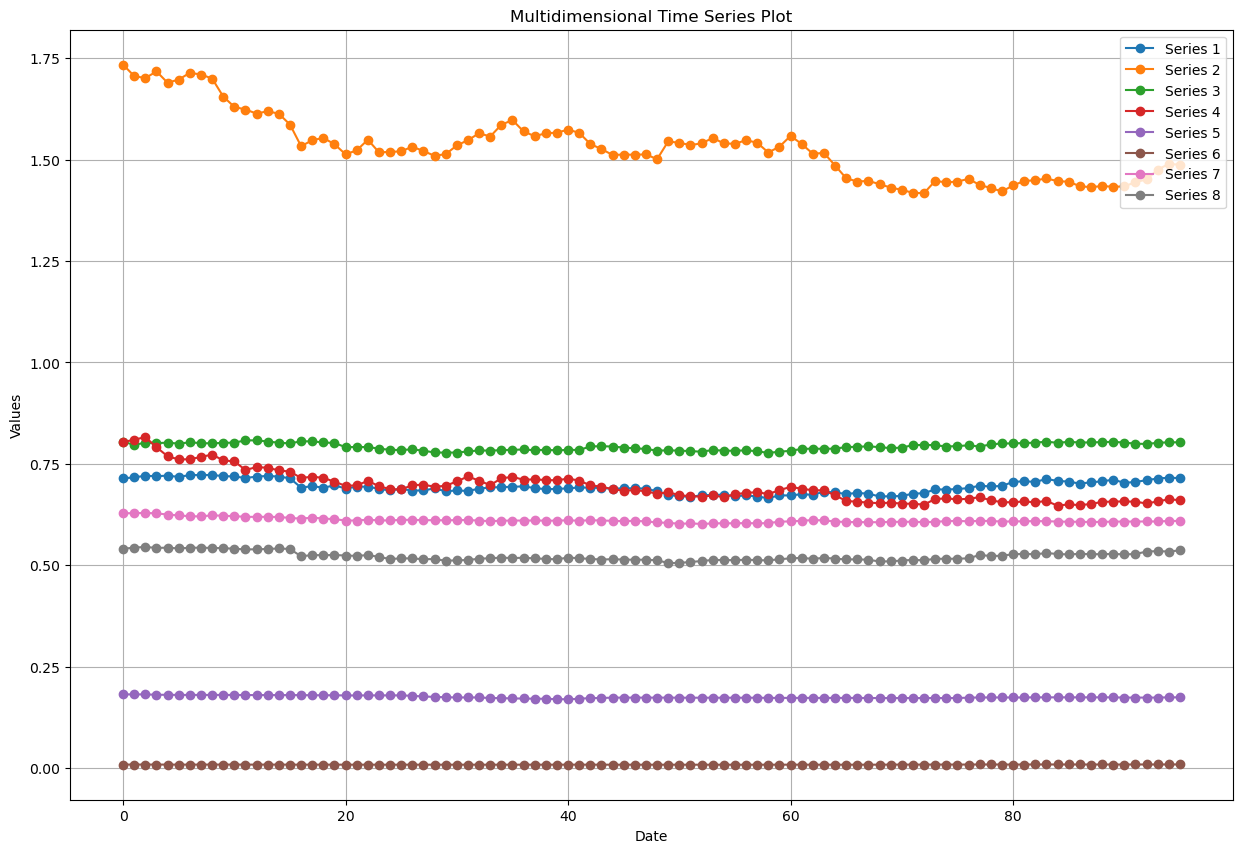

In [81]:
# 创建多维时序图
plt.figure(figsize=(15, 10))
N = original_x.shape[0]
# 绘制每个维度的时序数据
for i in range(N):
    plt.plot(original_x[i, :], marker='o', label=f'Series {i+1}')
plt.title('Multidimensional Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)


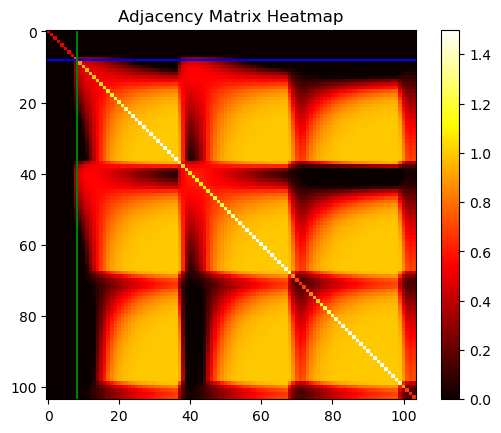

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# 假设这是你的邻接矩阵
adj_matrix = A[0].detach().cpu().numpy()

# 使用 matplotlib 绘制热力图
plt.imshow(adj_matrix, cmap='hot', interpolation='nearest')
plt.axhline(y=8, color='blue', linestyle='-')
plt.axvline(x=8, color='green', linestyle='-')

plt.colorbar()
plt.title('Adjacency Matrix Heatmap')
plt.show()



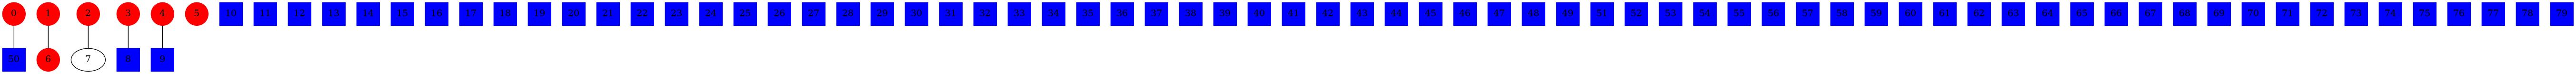

In [97]:
import pygraphviz as pgv
from IPython.display import Image

# 创建一个图对象
G = pgv.AGraph(strict=True, directed=False)

# 添加第一类节点
for i in range(7):
    G.add_node(i, shape='circle', color='red', style='filled')

# 添加第二类节点
for i in range(8, 80):
    G.add_node(i, shape='square', color='blue', style='filled')

# 添加边（假设你有二部图的邻接关系）
edges = [(0, 50), (1, 6), (2, 7), (3, 8), (4, 9)]  # 这些是示例边
for edge in edges:
    G.add_edge(*edge)

# 绘制图形
G.layout(prog='dot')  # 使用 dot 布局
G.draw('bipartite_graph.png')
Image('bipartite_graph.png')

### Traffic

In [3]:
from torch_timeseries.experiments.bistgnnv6_experiment import BiSTGNNv6Experiment
device = 'cuda:0'
exp = BiSTGNNv6Experiment(
    dataset_type="Traffic", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    # dataset_type="ExchangeRate",
    output_layer_type="tcn6",
    latent_dim=32,
    gcn_layers=2,
    tcn_channel=16,
    self_loop_eps=0.1,
    tcn_layers=5,
    pred_len=1,
    batch_size=32,
    horizon=24,
    data_path='../data',
    save_dir='../results',
    model_type="BiSTGNNv6",
    windows=168,
    device=device
)

seed = 42
exp._setup_run(seed)
# exp._check_run_exist(seed)
# exp._setup_run(seed)
# if exp._check_run_exist(seed):
#     exp._resume_run(seed)

exp._resume_from('/notebooks/pytorch_timeseries/results/runs/BiSTGNNv6/Traffic/w168h24s1/670048f44e30932885362a3008ea860f')


Using downloaded and verified file: ../data/traffic/traffic.txt.gz
Extracting ../data/traffic/traffic.txt.gz to ../data/traffic


train steps: 12089
val steps: 3317
test steps: 1565
torch.get_default_dtype() torch.float32
delete d0
resuming from /notebooks/pytorch_timeseries/results/runs/BiSTGNNv6/Traffic/w168h24s1/670048f44e30932885362a3008ea860f/run_checkpoint.pth


In [4]:
import torch

which = 300 

batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc = exp.dataloader.train_dataset[which]
batch_x = torch.tensor(batch_x).unsqueeze(0).to(device).float()
batch_y = torch.tensor(batch_y).unsqueeze(0).to(device).float()
batch_origin_y = torch.tensor(batch_origin_y).unsqueeze(0).to(device).float()
batch_x_date_enc = torch.tensor(batch_x_date_enc).unsqueeze(0).to(device).float()
batch_y_date_enc = torch.tensor(batch_y_date_enc).unsqueeze(0).to(device).float()


exp.dataloader.train_dataset[0]
y = batch_y
x = exp.dataloader.train_dataset.scaler.inverse_transform(batch_x)

batch_x = batch_x.transpose(1,2).to(device)
pred_y = exp.model(batch_x, batch_x_date_enc)


# 图卷积之后的node embedding
x = batch_x
Xs = exp.model.spatial_encoder(batch_x)
Xt = exp.model.temporal_encoder(x.transpose(1,2), batch_x_date_enc)
X = torch.concat([Xs, Xt], dim=1)  # (B, N+T, latent_dim)
A, edge_index, edge_weight = exp.model.tn_modules[0].graph_constructor(Xs, Xt)

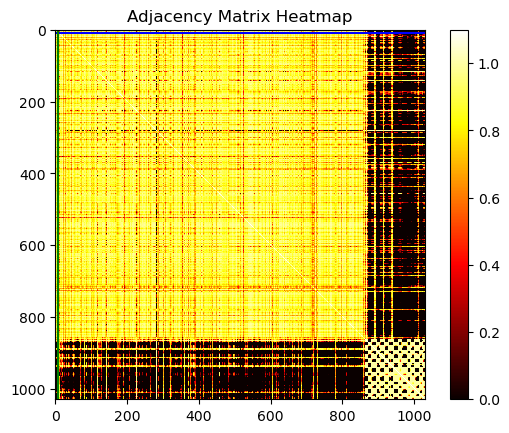

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 假设这是你的邻接矩阵
adj_matrix = A[0].detach().cpu().numpy()

# 使用 matplotlib 绘制热力图
plt.imshow(adj_matrix, cmap='hot', interpolation='nearest')
plt.axhline(y=8, color='blue', linestyle='-')
plt.axvline(x=8, color='green', linestyle='-')

plt.colorbar()
plt.title('Adjacency Matrix Heatmap')
plt.show()



### ETTh1

In [105]:
from torch_timeseries.experiments.bistgnnv6_experiment import BiSTGNNv6Experiment
device = 'cuda:5'
exp = BiSTGNNv6Experiment(
    dataset_type="ETTh1", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    # dataset_type="ExchangeRate",
    output_layer_type="tcn6",
    latent_dim=32,
    gcn_layers=2,
    tcn_channel=16,
    self_loop_eps=0.5,
    tcn_layers=3,
    pred_len=1,
    batch_size=32,
    dilated_factor=2,
    horizon=24,
    data_path='../data',
    save_dir='../results',
    model_type="BiSTGNNv6",
    windows=384,
    device=device
)

seed = 42
# exp.run(42)
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)


Using downloaded and verified file: ../data/ETTh1/ETTh1.csv
train steps: 11787
val steps: 3077
test steps: 1335
torch.get_default_dtype() torch.float32
delete d0
result directory exists: ../results/runs/BiSTGNNv6/ETTh1/w384h24s1/4c8b0264abf8f84efd7ed3f39f3b9a30
resuming from ../results/runs/BiSTGNNv6/ETTh1/w384h24s1/4c8b0264abf8f84efd7ed3f39f3b9a30/run_checkpoint.pth


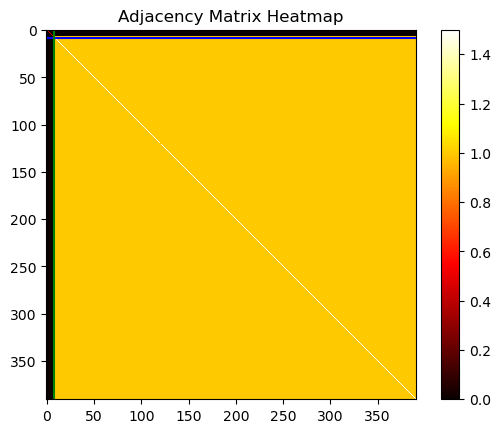

In [106]:
import torch

which = 1000 

batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc = exp.dataloader.train_dataset[which]
batch_x = torch.tensor(batch_x).unsqueeze(0).to(device).float()
batch_y = torch.tensor(batch_y).unsqueeze(0).to(device).float()
batch_origin_y = torch.tensor(batch_origin_y).unsqueeze(0).to(device).float()
batch_x_date_enc = torch.tensor(batch_x_date_enc).unsqueeze(0).to(device).float()
batch_y_date_enc = torch.tensor(batch_y_date_enc).unsqueeze(0).to(device).float()


y = batch_y
x = exp.dataloader.train_dataset.scaler.inverse_transform(batch_x)

batch_x = batch_x.transpose(1,2).to(device)
pred_y = exp.model(batch_x, batch_x_date_enc)


# 图卷积之后的node embedding
x = batch_x
Xs = exp.model.spatial_encoder(batch_x)
Xt = exp.model.temporal_encoder(x.transpose(1,2), batch_x_date_enc)
X = torch.concat([Xs, Xt], dim=1)  # (B, N+T, latent_dim)
A, edge_index, edge_weight = exp.model.tn_modules[0].graph_constructor(Xs, Xt)
import numpy as np
import matplotlib.pyplot as plt

# 假设这是你的邻接矩阵
adj_matrix = A[0].detach().cpu().numpy()

# 使用 matplotlib 绘制热力图
plt.imshow(adj_matrix, cmap='hot', interpolation='nearest')
plt.axhline(y=8, color='blue', linestyle='-')
plt.axvline(x=8, color='green', linestyle='-')

plt.colorbar()
plt.title('Adjacency Matrix Heatmap')
plt.show()



Using downloaded and verified file: ../data/ETTm1/ETTm1.csv
train steps: 48369
val steps: 13529
test steps: 6561
torch.get_default_dtype() torch.float32
delete d0
result directory exists: ../results/runs/BiSTGNNv6/ETTm1/w384h24s1/3a614250ce356a0bb95d37b6f0628171
resuming from ../results/runs/BiSTGNNv6/ETTm1/w384h24s1/3a614250ce356a0bb95d37b6f0628171/run_checkpoint.pth


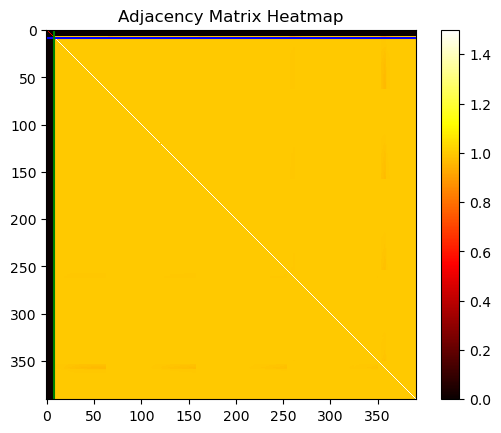

In [109]:
from torch_timeseries.experiments.bistgnnv6_experiment import BiSTGNNv6Experiment
device = 'cuda:5'
exp = BiSTGNNv6Experiment(
    dataset_type="ETTm1", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    # dataset_type="ExchangeRate",
    output_layer_type="tcn6",
    latent_dim=32,
    gcn_layers=2,
    tcn_channel=16,
    self_loop_eps=0.5,
    tcn_layers=3,
    pred_len=1,
    batch_size=32,
    dilated_factor=2,
    horizon=24,
    data_path='../data',
    save_dir='../results',
    model_type="BiSTGNNv6",
    windows=384,
    device=device
)

seed = 42
# exp.run(42)
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)
import torch

which = 1000 

batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc = exp.dataloader.train_dataset[which]
batch_x = torch.tensor(batch_x).unsqueeze(0).to(device).float()
batch_y = torch.tensor(batch_y).unsqueeze(0).to(device).float()
batch_origin_y = torch.tensor(batch_origin_y).unsqueeze(0).to(device).float()
batch_x_date_enc = torch.tensor(batch_x_date_enc).unsqueeze(0).to(device).float()
batch_y_date_enc = torch.tensor(batch_y_date_enc).unsqueeze(0).to(device).float()


y = batch_y
x = exp.dataloader.train_dataset.scaler.inverse_transform(batch_x)

batch_x = batch_x.transpose(1,2).to(device)
pred_y = exp.model(batch_x, batch_x_date_enc)


# 图卷积之后的node embedding
x = batch_x
Xs = exp.model.spatial_encoder(batch_x)
Xt = exp.model.temporal_encoder(x.transpose(1,2), batch_x_date_enc)
X = torch.concat([Xs, Xt], dim=1)  # (B, N+T, latent_dim)
A, edge_index, edge_weight = exp.model.tn_modules[0].graph_constructor(Xs, Xt)
import numpy as np
import matplotlib.pyplot as plt

# 假设这是你的邻接矩阵
adj_matrix = A[0].detach().cpu().numpy()

# 使用 matplotlib 绘制热力图
plt.imshow(adj_matrix, cmap='hot', interpolation='nearest')
plt.axhline(y=8, color='blue', linestyle='-')
plt.axvline(x=8, color='green', linestyle='-')

plt.colorbar()
plt.title('Adjacency Matrix Heatmap')
plt.show()



In [111]:
adj_matrix[-1]

array([2.7138947e-41, 2.7138947e-41, 2.7138947e-41, 2.7138947e-41,
       2.7138947e-41, 2.7138947e-41, 2.7138947e-41, 9.9918008e-01,
       9.9998283e-01, 9.9999750e-01, 9.9999905e-01, 9.9999958e-01,
       9.9999970e-01, 9.9999976e-01, 9.9999976e-01, 9.9999982e-01,
       9.9999982e-01, 9.9999988e-01, 9.9999988e-01, 9.9999988e-01,
       9.9999994e-01, 9.9999994e-01, 9.9999994e-01, 9.9999994e-01,
       9.9999994e-01, 9.9999994e-01, 9.9999994e-01, 9.9999994e-01,
       9.9999994e-01, 9.9999994e-01, 9.9999994e-01, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e

## 4.2 Multi-step

### 1. PEMS-04

/root/anaconda3/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


train steps: 11871
val steps: 3375
test steps: 1677
torch.get_default_dtype() torch.float32
delete d0
result directory exists: ../results/runs/BiSTGNNv6/PEMS04/w12h1s12/4765c4dc8f4a537cee036056469c37e0


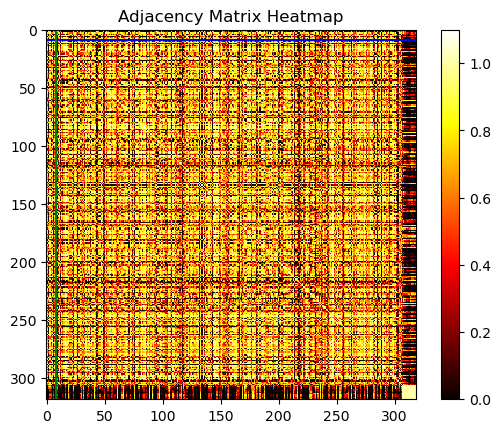

In [3]:
from torch_timeseries.experiments.bistgnnv6_experiment import BiSTGNNv6Experiment
device = 'cuda:5'
exp = BiSTGNNv6Experiment(
    dataset_type="METR_LA", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    # dataset_type="ExchangeRate",
    output_layer_type="tcn6",
    latent_dim=32,
    gcn_layers=2,
    tcn_channel=16,
    self_loop_eps=0.1,
    tcn_layers=3,
    batch_size=32,
    dilated_factor=2,
    horizon=1,
    pred_len=12,
    data_path='../data',
    save_dir='../results',
    model_type="BiSTGNNv6",
    windows=12,
    device=device
)

seed = 42
# exp.run(42)
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)
import torch

which = 1000 

batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc = exp.dataloader.train_dataset[which]
batch_x = torch.tensor(batch_x).unsqueeze(0).to(device).float()
batch_y = torch.tensor(batch_y).unsqueeze(0).to(device).float()
batch_origin_y = torch.tensor(batch_origin_y).unsqueeze(0).to(device).float()
batch_x_date_enc = torch.tensor(batch_x_date_enc).unsqueeze(0).to(device).float()
batch_y_date_enc = torch.tensor(batch_y_date_enc).unsqueeze(0).to(device).float()


y = batch_y
x = exp.dataloader.train_dataset.scaler.inverse_transform(batch_x)

batch_x = batch_x.transpose(1,2).to(device)
pred_y = exp.model(batch_x, batch_x_date_enc)


# 图卷积之后的node embedding
x = batch_x
Xs = exp.model.spatial_encoder(batch_x)
Xt = exp.model.temporal_encoder(x.transpose(1,2), batch_x_date_enc)
X = torch.concat([Xs, Xt], dim=1)  # (B, N+T, latent_dim)
A, edge_index, edge_weight = exp.model.tn_modules[0].graph_constructor(Xs, Xt)
import numpy as np
import matplotlib.pyplot as plt

# 假设这是你的邻接矩阵
adj_matrix = A[0].detach().cpu().numpy()

# 使用 matplotlib 绘制热力图
plt.imshow(adj_matrix, cmap='hot', interpolation='nearest')
plt.axhline(y=8, color='blue', linestyle='-')
plt.axvline(x=8, color='green', linestyle='-')

plt.colorbar()
plt.title('Adjacency Matrix Heatmap')
plt.show()



## METR-LA

#### 0 

In [7]:
from torch_timeseries.experiments.bistgnnv6_experiment import BiSTGNNv6Experiment
device = 'cpu'
exp = BiSTGNNv6Experiment(
    dataset_type="METR_LA", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    # dataset_type="ExchangeRate",
    batch_size=32,
    output_layer_type="tcn6",
    latent_dim=32,
    dropout=0.3,
    gcn_layers=1,
    tcn_channel=32,
    gcn_type='weighted_han',
    self_loop_eps=0.1,
    invtrans_loss=True,
    tcn_layers=3,
    graph_build_type='predefined_adaptive',
    dilated_factor=2,
    horizon=1,
    pred_len=12,
    data_path='../data',
    save_dir='../results',
    model_type="BiSTGNNv6",
    windows=12,
    device=device
)

seed = 42
# exp.run(42)
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)
# exp._resume_from('/notebooks/pytorch_timeseries/results/runs/BiSTGNNv6/METR_LA/w12h1s12/0befc310f4ef0507b86d6f22fefc633c')
import torch

which = 0  # 1000

batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc = exp.dataloader.train_dataset[which]
batch_x = torch.tensor(batch_x).unsqueeze(0).to(device).float()
batch_y = torch.tensor(batch_y).unsqueeze(0).to(device).float()
batch_origin_y = torch.tensor(batch_origin_y).unsqueeze(0).to(device).float()
batch_x_date_enc = torch.tensor(batch_x_date_enc).unsqueeze(0).to(device).float()
batch_y_date_enc = torch.tensor(batch_y_date_enc).unsqueeze(0).to(device).float()


y = batch_y
x = exp.dataloader.train_dataset.scaler.inverse_transform(batch_x)

batch_x = batch_x.transpose(1,2).to(device)
pred_y = exp.model(batch_x, batch_x_date_enc)


# 图卷积之后的node embedding
x = batch_x
Xs = exp.model.spatial_encoder(batch_x)
Xt = exp.model.temporal_encoder(x.transpose(1,2), batch_x_date_enc)
X = torch.concat([Xs, Xt], dim=1)  # (B, N+T, latent_dim)
A, edge_index, edge_weight = exp.model.tn_modules[0].graph_constructor(Xs, Xt)
import numpy as np
import matplotlib.pyplot as plt

# 假设这是你的邻接矩阵
adj_matrix = A[0].detach().cpu().numpy()

# 使用 matplotlib 绘制热力图
plt.imshow(adj_matrix, cmap='hot', interpolation='nearest')
plt.axhline(y=8, color='blue', linestyle='-')
plt.axvline(x=8, color='green', linestyle='-')

plt.colorbar()
plt.title('Adjacency Matrix Heatmap')
plt.show()



train steps: 23967
val steps: 6831
test steps: 3405
torch.get_default_dtype() torch.float32
delete d0
resuming from /notebooks/pytorch_timeseries/results/runs/BiSTGNNv6/METR_LA/w12h1s12/0befc310f4ef0507b86d6f22fefc633c/run_checkpoint.pth


RuntimeError: Error(s) in loading state_dict for BiSTGNNv6:
	Unexpected key(s) in state_dict: "tn_modules.0.graph_conv.convs.1.q", "tn_modules.0.graph_conv.convs.1.k_lin.weight", "tn_modules.0.graph_conv.convs.1.k_lin.bias", "tn_modules.0.graph_conv.convs.1.proj.s.weight", "tn_modules.0.graph_conv.convs.1.proj.s.bias", "tn_modules.0.graph_conv.convs.1.proj.t.weight", "tn_modules.0.graph_conv.convs.1.proj.t.bias", "tn_modules.0.graph_conv.convs.1.lin_src.s__s2s__s", "tn_modules.0.graph_conv.convs.1.lin_src.t__t2t__t", "tn_modules.0.graph_conv.convs.1.lin_src.s__s2t__t", "tn_modules.0.graph_conv.convs.1.lin_src.t__t2s__s", "tn_modules.0.graph_conv.convs.1.lin_dst.s__s2s__s", "tn_modules.0.graph_conv.convs.1.lin_dst.t__t2t__t", "tn_modules.0.graph_conv.convs.1.lin_dst.s__s2t__t", "tn_modules.0.graph_conv.convs.1.lin_dst.t__t2s__s", "output_layer.tcn.filter_convs.3.tconv.0.weight", "output_layer.tcn.filter_convs.3.tconv.0.bias", "output_layer.tcn.filter_convs.3.tconv.1.weight", "output_layer.tcn.filter_convs.3.tconv.1.bias", "output_layer.tcn.filter_convs.3.tconv.2.weight", "output_layer.tcn.filter_convs.3.tconv.2.bias", "output_layer.tcn.filter_convs.3.tconv.3.weight", "output_layer.tcn.filter_convs.3.tconv.3.bias", "output_layer.tcn.filter_convs.4.tconv.0.weight", "output_layer.tcn.filter_convs.4.tconv.0.bias", "output_layer.tcn.filter_convs.4.tconv.1.weight", "output_layer.tcn.filter_convs.4.tconv.1.bias", "output_layer.tcn.filter_convs.4.tconv.2.weight", "output_layer.tcn.filter_convs.4.tconv.2.bias", "output_layer.tcn.filter_convs.4.tconv.3.weight", "output_layer.tcn.filter_convs.4.tconv.3.bias", "output_layer.tcn.gate_convs.3.tconv.0.weight", "output_layer.tcn.gate_convs.3.tconv.0.bias", "output_layer.tcn.gate_convs.3.tconv.1.weight", "output_layer.tcn.gate_convs.3.tconv.1.bias", "output_layer.tcn.gate_convs.3.tconv.2.weight", "output_layer.tcn.gate_convs.3.tconv.2.bias", "output_layer.tcn.gate_convs.3.tconv.3.weight", "output_layer.tcn.gate_convs.3.tconv.3.bias", "output_layer.tcn.gate_convs.4.tconv.0.weight", "output_layer.tcn.gate_convs.4.tconv.0.bias", "output_layer.tcn.gate_convs.4.tconv.1.weight", "output_layer.tcn.gate_convs.4.tconv.1.bias", "output_layer.tcn.gate_convs.4.tconv.2.weight", "output_layer.tcn.gate_convs.4.tconv.2.bias", "output_layer.tcn.gate_convs.4.tconv.3.weight", "output_layer.tcn.gate_convs.4.tconv.3.bias", "output_layer.tcn.residual_convs.3.weight", "output_layer.tcn.residual_convs.3.bias", "output_layer.tcn.residual_convs.4.weight", "output_layer.tcn.residual_convs.4.bias", "output_layer.tcn.skip_convs.3.weight", "output_layer.tcn.skip_convs.3.bias", "output_layer.tcn.skip_convs.4.weight", "output_layer.tcn.skip_convs.4.bias", "output_layer.tcn.norms.3.weight", "output_layer.tcn.norms.3.bias", "output_layer.tcn.norms.4.weight", "output_layer.tcn.norms.4.bias". 
	size mismatch for output_layer.tcn.skip_convs.0.weight: copying a param with shape torch.Size([32, 32, 1, 181]) from checkpoint, the shape in current model is torch.Size([32, 32, 1, 37]).
	size mismatch for output_layer.tcn.skip_convs.1.weight: copying a param with shape torch.Size([32, 32, 1, 169]) from checkpoint, the shape in current model is torch.Size([32, 32, 1, 25]).
	size mismatch for output_layer.tcn.skip_convs.2.weight: copying a param with shape torch.Size([32, 32, 1, 145]) from checkpoint, the shape in current model is torch.Size([32, 32, 1, 1]).
	size mismatch for output_layer.tcn.norms.0.weight: copying a param with shape torch.Size([32, 207, 181]) from checkpoint, the shape in current model is torch.Size([32, 207, 37]).
	size mismatch for output_layer.tcn.norms.0.bias: copying a param with shape torch.Size([32, 207, 181]) from checkpoint, the shape in current model is torch.Size([32, 207, 37]).
	size mismatch for output_layer.tcn.norms.1.weight: copying a param with shape torch.Size([32, 207, 169]) from checkpoint, the shape in current model is torch.Size([32, 207, 25]).
	size mismatch for output_layer.tcn.norms.1.bias: copying a param with shape torch.Size([32, 207, 169]) from checkpoint, the shape in current model is torch.Size([32, 207, 25]).
	size mismatch for output_layer.tcn.norms.2.weight: copying a param with shape torch.Size([32, 207, 145]) from checkpoint, the shape in current model is torch.Size([32, 207, 1]).
	size mismatch for output_layer.tcn.norms.2.bias: copying a param with shape torch.Size([32, 207, 145]) from checkpoint, the shape in current model is torch.Size([32, 207, 1]).
	size mismatch for output_layer.tcn.skip0.weight: copying a param with shape torch.Size([32, 32, 1, 187]) from checkpoint, the shape in current model is torch.Size([32, 32, 1, 43]).

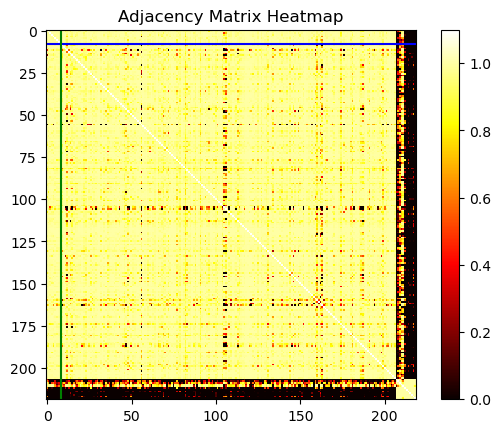

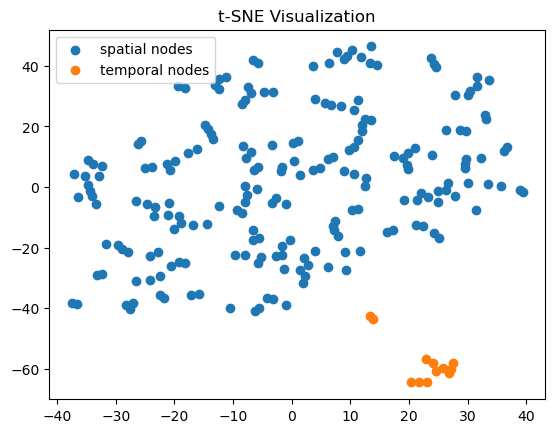

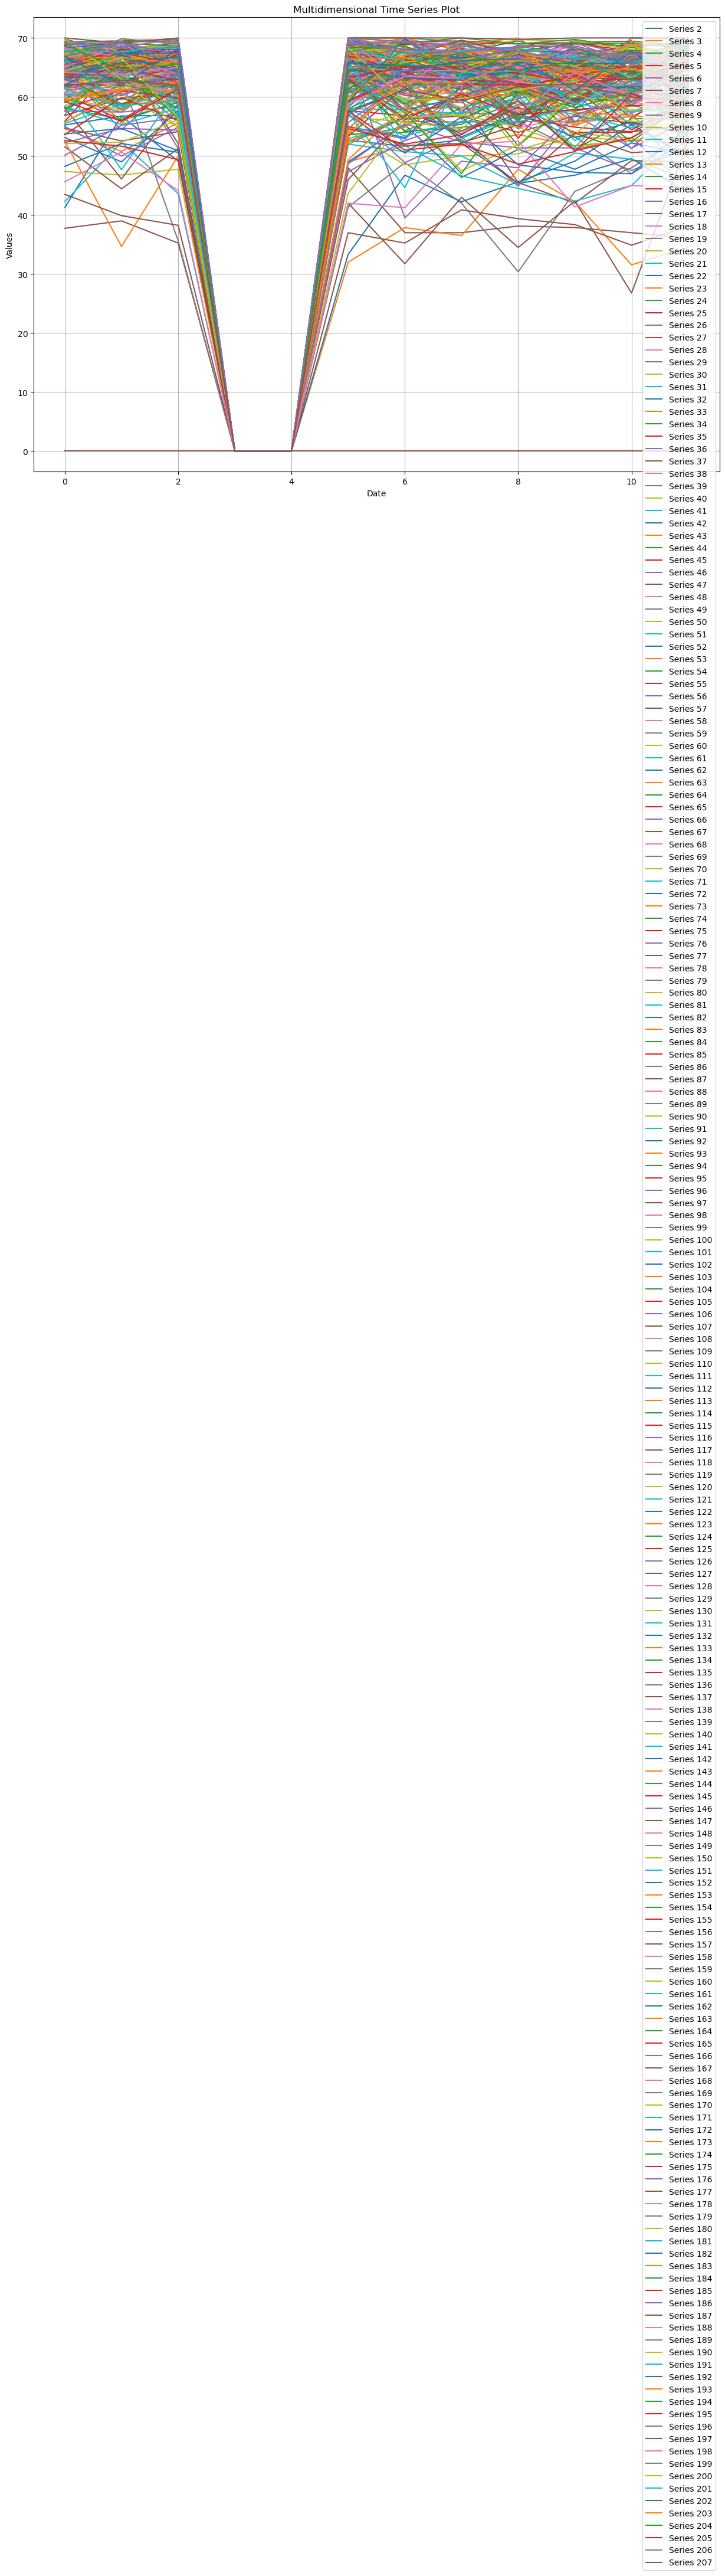

In [29]:

which = 0
Xs, Xt, A = get_dynamic_embed_graph(exp, which, device) # 0 useful 
adj_matrix = A[0].detach().cpu().numpy()

plot_adj(A)
plot_dynamic_embedding(Xs, Xt, exp)
# plot_window_exclude(exp, which, exclude=[0])

In [20]:
from torch_timeseries.datasets.metr_la import METR_LA


dataset = METR_LA('/notebooks/pytorch_timeseries/data')
import plotly.graph_objects as go

# 假设 dataset.df 是一个包含时间戳和其他数据的 DataFrame
# 并且时间戳是索引
df = dataset.df.copy()
df['avg'] = dataset.df.mean(axis=1)

# 选择要绘制的数据和颜色
# drawed_data = dataset.df.iloc[0:12].copy()
drawed_data = dataset.df.iloc[0:12].copy()
selected_columns = [ 1,2,3,4,5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]

# 创建图形
fig = go.Figure()

# 为每个选定的列添加一个线条
for i, col in enumerate(selected_columns):
    fig.add_trace(go.Scatter(x=list(range(len(drawed_data.index))), y=drawed_data.iloc[:, col], mode='lines', name=col))

# 更新图形布局
fig.update_layout(title='Time Series Plot with Timestamps')

# 显示图形
fig.show()



##### part

207

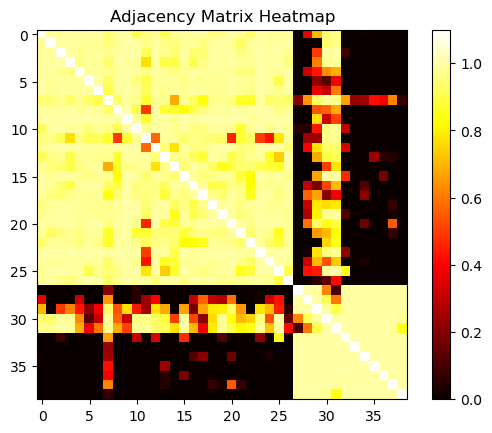

In [19]:

import numpy as np
window = 12
# smaller_matrix = adj_matrix[np.ix_(selected_columns, selected_columns)]
selected_s_indices = selected_columns
selected_t_indices = list(range(dataset.num_features, dataset.num_features + window))
smaller_matrix = adj_matrix[np.ix_(selected_s_indices + selected_t_indices, 
                                   selected_s_indices + selected_t_indices)]

# 使用 matplotlib 绘制热力图
plt.imshow(smaller_matrix, cmap='hot', interpolation='nearest')
# plt.axhline(y=8, color='blue', linestyle='-')
# plt.axvline(x=8, color='green', linestyle='-')

plt.colorbar()
plt.title('Adjacency Matrix Heatmap')
plt.show()

array([[1.0988326 , 0.983405  , 0.9876425 , 0.992616  , 0.9888262 ,
        0.99433994, 0.9944785 , 0.9414881 , 0.9884493 , 0.99902236,
        0.9095674 , 0.9540989 , 0.9794253 , 0.90323603, 0.98190135,
        0.98839647, 0.99632895, 0.993566  , 0.        , 0.3645355 ,
        0.7010556 , 0.94438356, 0.97511315, 0.        , 0.        ,
        0.01485781, 0.        , 0.        , 0.        , 0.        ],
       [0.983405  , 1.0992054 , 0.99630487, 0.99060106, 0.99320203,
        0.98695165, 0.9839055 , 0.9495498 , 0.9864545 , 0.99777514,
        0.99549764, 0.9696588 , 0.99392885, 0.96821856, 0.9508182 ,
        0.9836254 , 0.9851328 , 0.9616428 , 0.        , 0.        ,
        0.        , 0.93470573, 0.9700626 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.9876425 , 0.99630487, 1.0992789 , 0.9978511 , 0.97436935,
        0.9856499 , 0.98965144, 0.97152364, 0.9915997 , 0.998919  ,
        0.9978411 , 0.9183539 , 0.99828595, 0.

#### 1000

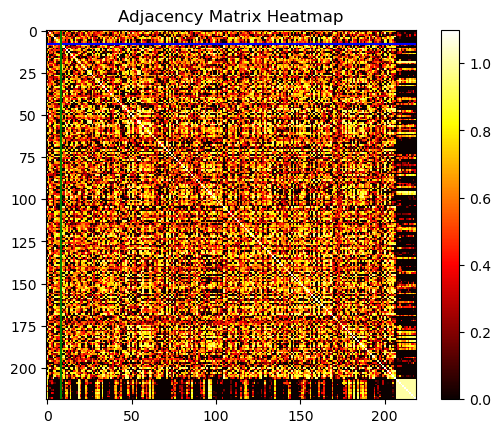

In [21]:

which = 1000

batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc = exp.dataloader.train_dataset[which]
batch_x = torch.tensor(batch_x).unsqueeze(0).to(device).float()
batch_y = torch.tensor(batch_y).unsqueeze(0).to(device).float()
batch_origin_y = torch.tensor(batch_origin_y).unsqueeze(0).to(device).float()
batch_x_date_enc = torch.tensor(batch_x_date_enc).unsqueeze(0).to(device).float()
batch_y_date_enc = torch.tensor(batch_y_date_enc).unsqueeze(0).to(device).float()


y = batch_y
x = exp.dataloader.train_dataset.scaler.inverse_transform(batch_x)

batch_x = batch_x.transpose(1,2).to(device)
pred_y = exp.model(batch_x, batch_x_date_enc)


# 图卷积之后的node embedding
x = batch_x
Xs = exp.model.spatial_encoder(batch_x)
Xt = exp.model.temporal_encoder(x.transpose(1,2), batch_x_date_enc)
X = torch.concat([Xs, Xt], dim=1)  # (B, N+T, latent_dim)
A, edge_index, edge_weight = exp.model.tn_modules[0].graph_constructor(Xs, Xt)
import numpy as np
import matplotlib.pyplot as plt

# 假设这是你的邻接矩阵
adj_matrix = A[0].detach().cpu().numpy()

# 使用 matplotlib 绘制热力图
plt.imshow(adj_matrix, cmap='hot', interpolation='nearest')
plt.axhline(y=8, color='blue', linestyle='-')
plt.axvline(x=8, color='green', linestyle='-')

plt.colorbar()
plt.title('Adjacency Matrix Heatmap')
plt.show()


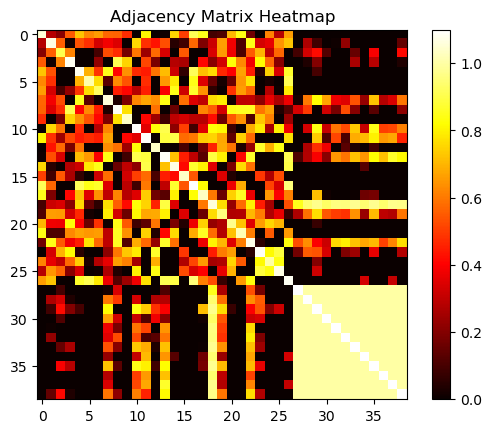

In [23]:

import numpy as np
window = 12
# smaller_matrix = adj_matrix[np.ix_(selected_columns, selected_columns)]
selected_s_indices = selected_columns
selected_t_indices = list(range(dataset.num_features, dataset.num_features + window))
smaller_matrix = adj_matrix[np.ix_(selected_s_indices + selected_t_indices, 
                                   selected_s_indices + selected_t_indices)]

# 使用 matplotlib 绘制热力图
plt.imshow(smaller_matrix, cmap='hot', interpolation='nearest')
# plt.axhline(y=8, color='blue', linestyle='-')
# plt.axvline(x=8, color='green', linestyle='-')

plt.colorbar()
plt.title('Adjacency Matrix Heatmap')
plt.show()

In [22]:
dataset = METR_LA('/notebooks/pytorch_timeseries/data')
import plotly.graph_objects as go

# 假设 dataset.df 是一个包含时间戳和其他数据的 DataFrame
# 并且时间戳是索引
df = dataset.df.copy()
df['avg'] = dataset.df.mean(axis=1)

# 选择要绘制的数据和颜色
# drawed_data = dataset.df.iloc[0:12].copy()
drawed_data = dataset.df.iloc[1000:1012].copy()
# selected_columns = [ 1,2,3,4,5, 6,7,8,9,10,11,12,13,14,15,16,17,18]

# 创建图形
fig = go.Figure()

# 为每个选定的列添加一个线条
for i, col in enumerate(selected_columns):
    fig.add_trace(go.Scatter(x=drawed_data.index, y=drawed_data.iloc[:, col], mode='lines', name=col))

# 更新图形布局
fig.update_layout(title='Time Series Plot with Timestamps')

# 显示图形
fig.show()




In [2]:
from torch.nn.functional import gumbel_softmax

# 示例用法，假设邻接矩阵A已经给定:
adjacency_matrix = torch.tensor([[0.2, 0.8, 0.4],
                                 [0.8, 0.0, 0.6],
                                 [0.4, 0.6, 0.0]])

# 使用邻接矩阵中的值作为logits进行采样
sample = gumbel_softmax(adjacency_matrix, tau = 0.5, hard=True)
print("Hard Sample:", sample)
sample = gumbel_softmax(adjacency_matrix, tau = 0.5, hard=False)
print("Soft Sample:", sample)


NameError: name 'torch' is not defined

In [3]:
logits = torch.randn(20, 32)


F.gumbel_softmax(logits, tau=1, hard=False)

tensor([[6.5824e-01, 9.4860e-03, 2.3038e-03, 1.2287e-02, 5.0365e-03, 1.0435e-03,
         6.1969e-02, 2.9528e-03, 1.9270e-02, 3.2489e-04, 1.1220e-03, 7.3190e-04,
         1.0633e-03, 3.9139e-03, 3.0053e-03, 1.5127e-03, 1.8721e-03, 2.6302e-02,
         6.8843e-03, 3.4652e-03, 1.6947e-02, 4.5896e-02, 7.0948e-02, 3.0594e-03,
         1.0449e-02, 5.2855e-03, 1.2585e-03, 1.1366e-02, 2.1188e-03, 1.3678e-03,
         3.8120e-03, 4.7031e-03],
        [2.5437e-03, 9.1299e-03, 1.3917e-02, 1.1308e-01, 5.1075e-03, 3.2356e-02,
         9.8416e-03, 1.8297e-01, 3.2236e-02, 1.8131e-02, 4.7785e-03, 3.7679e-02,
         3.4946e-03, 3.7962e-03, 1.3282e-02, 1.1013e-02, 1.2825e-02, 1.5860e-02,
         5.9796e-03, 6.9997e-03, 3.4816e-03, 1.9608e-03, 2.1826e-03, 9.7706e-02,
         1.0359e-02, 6.9832e-03, 1.0972e-01, 4.3828e-02, 3.8992e-03, 2.5405e-03,
         1.7724e-01, 5.0741e-03],
        [2.3798e-03, 3.1071e-03, 1.5780e-04, 4.5254e-04, 6.3405e-02, 2.5780e-03,
         1.3659e-02, 3.3523e-03, 7.5350e-

In [7]:
import pyro
import torch 
# 示例用法，假设邻接矩阵A已经给定:
sub_adj = torch.rand(10,20)

adj_logits = torch.relu(sub_adj)
adj_logits_ = (adj_logits / torch.max(adj_logits))
adj_sampled = pyro.distributions.RelaxedBernoulliStraightThrough(temperature=0.2, probs=adj_logits_).rsample()


In [9]:
adj_sampled * adj_logits_

tensor([[0.5733, 0.5163, 0.6639, 0.0000, 0.0000, 0.0000, 0.6505, 0.5592, 0.0000,
         0.7070, 0.0000, 0.2066, 0.0000, 0.2359, 0.9989, 0.0000, 0.0000, 0.5942,
         0.9166, 0.0000],
        [0.6896, 0.0000, 0.4451, 0.7407, 0.9066, 0.0000, 0.0000, 0.5573, 0.8005,
         0.9868, 0.6915, 0.1825, 0.0000, 0.0000, 0.0000, 0.9131, 0.8762, 0.9412,
         0.0000, 0.0000],
        [0.7418, 0.0000, 0.0000, 0.0000, 0.0000, 0.3603, 0.8729, 0.0000, 0.2196,
         0.3940, 0.0000, 0.0000, 0.0000, 0.6880, 0.0000, 0.9019, 0.4569, 0.6670,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.8925, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.8645, 0.6095, 0.0000, 0.6407, 0.6180, 0.3899, 0.0000,
         0.7286, 0.9375],
        [0.4744, 0.4337, 0.8679, 0.0000, 0.5322, 0.0000, 0.0000, 0.9587, 0.0000,
         0.0000, 0.9168, 0.7951, 0.0000, 0.0938, 0.0000, 0.0000, 0.0000, 0.0000,
         0.7349, 0.2502],
        [0.0000, 0.0000, 0.7350, 0.0000, 0.6311, 0.0000, 0.5

In [10]:
adj_logits_

tensor([[0.5733, 0.5163, 0.6639, 0.0813, 0.0889, 0.8251, 0.6505, 0.5592, 0.0630,
         0.7070, 0.2140, 0.2066, 0.7711, 0.2359, 0.9989, 0.0375, 0.4744, 0.5942,
         0.9166, 0.3808],
        [0.6896, 0.3909, 0.4451, 0.7407, 0.9066, 0.0258, 0.5571, 0.5573, 0.8005,
         0.9868, 0.6915, 0.1825, 0.2812, 0.1098, 0.3681, 0.9131, 0.8762, 0.9412,
         0.4246, 0.4920],
        [0.7418, 0.3752, 0.7162, 0.1158, 0.3320, 0.3603, 0.8729, 0.2218, 0.2196,
         0.3940, 0.7974, 0.0345, 0.3324, 0.6880, 0.4985, 0.9019, 0.4569, 0.6670,
         0.2056, 0.4235],
        [0.3185, 0.6601, 0.8925, 0.1098, 0.3886, 0.3669, 0.0863, 0.6652, 0.2691,
         0.1990, 0.2337, 0.8645, 0.6095, 0.7125, 0.6407, 0.6180, 0.3899, 0.2988,
         0.7286, 0.9375],
        [0.4744, 0.4337, 0.8679, 0.5781, 0.5322, 0.0707, 0.4699, 0.9587, 0.0279,
         0.0598, 0.9168, 0.7951, 0.1273, 0.0938, 0.8983, 0.6774, 0.5505, 0.1412,
         0.7349, 0.2502],
        [0.4978, 0.1891, 0.7350, 0.3480, 0.6311, 0.4505, 0.5

In [19]:
da

tensor([[1., 2.],
        [2., 3.]])

# tryout

In [1]:
from torch_timeseries.experiments.hstgnn_experimentv7 import HSTGNNv7Experiment

import sys
import os
sys.path.insert(0, os.path.abspath('/notebooks/pytorch_timeseries'))

from torch_timeseries.experiments.hstgnn_experimentv3 import HSTGNNv3Experiment
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch
import sys
import os
sys.path.insert(0, os.path.abspath('/notebooks/pytorch_timeseries'))

from torch_timeseries.experiments.hstgnn_experimentv3 import HSTGNNv3Experiment
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
def get_pred(exp, which, device):
    batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc = exp.dataloader.train_dataset[which]
    batch_x = torch.tensor(batch_x).unsqueeze(0).to(device).float()
    batch_y = torch.tensor(batch_y).unsqueeze(0).to(device).float()
    batch_origin_y = torch.tensor(batch_origin_y).unsqueeze(0).to(device).float()
    batch_x_date_enc = torch.tensor(batch_x_date_enc).unsqueeze(0).to(device).float()
    batch_y_date_enc = torch.tensor(batch_y_date_enc).unsqueeze(0).to(device).float()


    exp.dataloader.train_dataset[0]
    y = batch_y
    x = exp.dataloader.train_dataset.scaler.inverse_transform(batch_x).transpose(1,2)

    batch_x = batch_x.transpose(1,2).to(device)
    pred_y = exp.model(batch_x, batch_x_date_enc)

    return pred_y



def get_dynamic_embed_graph(exp, which, device):
    batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc = exp.dataloader.train_dataset[which]
    batch_x = torch.tensor(batch_x).unsqueeze(0).to(device).float()
    batch_y = torch.tensor(batch_y).unsqueeze(0).to(device).float()
    batch_origin_y = torch.tensor(batch_origin_y).unsqueeze(0).to(device).float()
    batch_x_date_enc = torch.tensor(batch_x_date_enc).unsqueeze(0).to(device).float()
    batch_y_date_enc = torch.tensor(batch_y_date_enc).unsqueeze(0).to(device).float()


    exp.dataloader.train_dataset[0]
    y = batch_y
    x = exp.dataloader.train_dataset.scaler.inverse_transform(batch_x).transpose(1,2)

    batch_x = batch_x.transpose(1,2).to(device)
    pred_y = exp.model(batch_x, batch_x_date_enc)
    Xs = exp.model.spatial_encoder(batch_x)
    Xt = exp.model.temporal_encoder(batch_x.transpose(1,2), batch_x_date_enc)
    # X = torch.concat([Xs, Xt], dim=1)  # (B, N+T, latent_dim)
    A, edge_index, edge_weight = exp.model.tn_modules[0].graph_constructor(Xs, Xt)
    return Xs, Xt, A 

def plot_adj(adj_matrix, s_num=8, t_num=8):
# 假设这是你的邻接矩阵
    # adj_matrix = adj[0].detach().cpu().numpy()

    # 使用 matplotlib 绘制热力图
    plt.imshow(adj_matrix, cmap='hot', interpolation='nearest')
    plt.axhline(y=t_num, color='blue', linestyle='-')
    plt.axvline(x=s_num, color='green', linestyle='-')

    plt.colorbar()
    plt.title('Adjacency Matrix Heatmap')
    plt.show()
    
def plot_dynamic_embedding(Xs, Xt, exp):
    import numpy as np
    s_emb = exp.model.spatial_encoder.static_node_embedding.weight
    t_emb = exp.model.temporal_encoder.static_node_embedding.weight
    # Concatenate s_emb and t_emb
    combined_emb = np.concatenate((Xs[0].detach().cpu().numpy(), Xt[0].detach().cpu().numpy()), axis=0)
    # # Apply t-SNE to reduce dimensionality to 2 components
    tsne = TSNE(n_components=2, perplexity=5, random_state=10)
    combined_emb_tsne = tsne.fit_transform(combined_emb)

    # # Separate the t-SNE results back into s_emb and t_emb

    l = len(s_emb) # + 215

    s_emb_tsne = combined_emb_tsne[:l]
    t_emb_tsne = combined_emb_tsne[l:]

    # Create a scatter plot
    plt.scatter(s_emb_tsne[:, 0], s_emb_tsne[:, 1], label='spatial nodes')
    plt.scatter(t_emb_tsne[:, 0], t_emb_tsne[:, 1], label='temporal nodes')
    plt.title('t-SNE Visualization')
    plt.legend()
    plt.show()
    
    
def plot_window(exp, which):
    batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc = exp.dataloader.train_dataset[which]
    x = exp.dataloader.train_dataset.scaler.inverse_transform(batch_x)
    original_x = x.transpose(1, 0)
    # 创建多维时序图
    plt.figure(figsize=(15, 10))
    N = original_x.shape[0]
    # 绘制每个维度的时序数据
    for i in range(N):
        plt.plot(original_x[i, :], label=f'Series {i+1}')
    plt.title('Multidimensional Time Series Plot')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)


def plot_window_exclude(exp, which, exclude=[0]):
    batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc = exp.dataloader.train_dataset[which]
    x = exp.dataloader.train_dataset.scaler.inverse_transform(batch_x)
    original_x = x.transpose(1, 0)
    # 创建多维时序图
    plt.figure(figsize=(15, 10))
    N = original_x.shape[0]
    # 绘制每个维度的时序数据
    for i in range(N):
        if i in exclude:
            continue
        plt.plot(original_x[i, :], label=f'Series {i+1}')
    plt.title('Multidimensional Time Series Plot')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)


device = 'cuda:0'
exp = HSTGNNv7Experiment(
    dataset_type="METR_LA", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    # dataset_type="ExchangeRate",
    batch_size=32,
    horizon=1,
    graph_build_type="attsim_direc_tt_mask1", # mlpsim_direc_tt_mask
    gcn_type='weighted_han_update3',
    invtrans_loss=True,
    pred_len=12,
    data_path='../data',
    save_dir='../results/',
    windows=12,
    device=device,
)

# # 42,233,666,19971203,19980224
seed = 42
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)

# exp._resume_from('/notebooks/pytorch_timeseries/results/runs/BiSTGNNv6/METR_LA/w12h1s12/0befc310f4ef0507b86d6f22fefc633c')

/root/anaconda3/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


train steps: 23967
val steps: 6831
test steps: 3405
torch.get_default_dtype() torch.float32
graph_build_type dis mlpsim_direc_tt_mask_sample
result directory exists: ../results/runs/HSTGNNv7/METR_LA/w12h1s12/2547b1edea9b15a51b9aa8baae9b566a


In [2]:
exp.run(seed)

torch.get_default_dtype() torch.float32
graph_build_type dis mlpsim_direc_tt_mask_sample
result directory exists: ../results/runs/HSTGNNv7/METR_LA/w12h1s12/2547b1edea9b15a51b9aa8baae9b566a
run : 0 in seed: 42
+-------------------------------------------------------------------------+------------+
|                                 Modules                                 | Parameters |
+-------------------------------------------------------------------------+------------+
|               spatial_encoder.static_node_embedding.weight              |    3312    |
|               spatial_encoder.spatial_projection.0.weight               |    448     |
|                spatial_encoder.spatial_projection.0.bias                |     16     |
|               spatial_encoder.spatial_projection.2.weight               |    256     |
|                spatial_encoder.spatial_projection.2.bias                |     16     |
|              temporal_encoder.static_node_embedding.weight              |    

100%|██████████| 23967/23967 [08:31<00:00, 46.87it/s, epoch=0, loss=65.1, lr=0.0003]


Epoch: 1 cost time: 511.380086183548
Evaluating .... 


100%|██████████| 6831/6831 [00:55<00:00, 122.53it/s]


vali_results: {'mae': 5.435947418212891, 'mape': 0.12048195139082718, 'mse': 146.49349975585938, 'rmse': 12.103449821472168}
Testing .... 


100%|██████████| 3405/3405 [00:29<00:00, 116.05it/s]


test_results: {'mae': 5.171316146850586, 'mape': 0.11957275017644747, 'mse': 142.1204376220703, 'rmse': 11.921427726745605}
Validation loss decreased (inf --> 146.493500).  Saving model ...
Saving run checkpoint to '../results/runs/HSTGNNv7/METR_LA/w12h1s12/2547b1edea9b15a51b9aa8baae9b566a'.
Run state saved ... 
torch.get_default_dtype() torch.float32


  0%|          | 32/23967 [00:03<43:08,  9.25it/s, epoch=1, loss=65.6, lr=0.0003]


KeyboardInterrupt: 

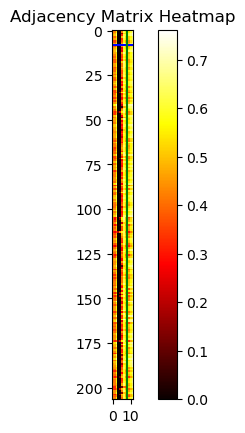

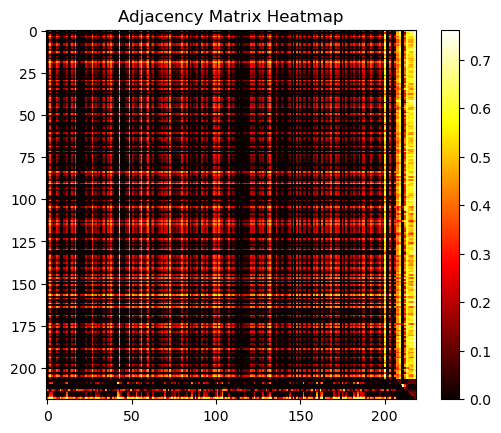

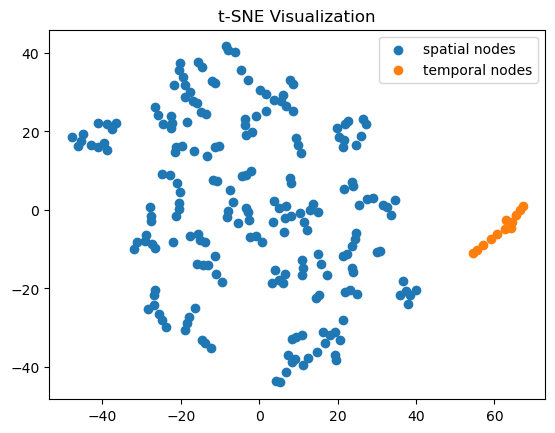

In [9]:
# # 
which = 0

Xs, Xt, A = get_dynamic_embed_graph(exp, which, device) # 0 useful 
adj_matrix = A[0].detach().cpu().numpy()
plot_adj(adj_matrix[:-12, -12:])
plt.imshow(adj_matrix, cmap='hot', interpolation='nearest')

plt.colorbar()
plt.title('Adjacency Matrix Heatmap')
plt.show()

# adj[0].detach().cpu().numpy()
plot_dynamic_embedding(Xs, Xt, exp) 
# plot_window_exclude(exp, which, exclude=[0])

In [13]:
torch

tensor([[[ 5.1003e-04, -1.4176e-03, -4.6371e-03,  ..., -4.3134e-02,
           4.3093e-02, -1.3444e-02],
         [ 2.4648e-03, -4.7513e-03, -3.9578e-03,  ..., -4.3572e-02,
           4.4201e-02, -1.5616e-02],
         [ 3.4469e-03,  1.1163e-03, -5.4291e-03,  ..., -4.2453e-02,
           4.3478e-02, -1.7178e-02],
         ...,
         [ 2.4288e-03, -1.2911e-03, -4.2592e-03,  ..., -4.4153e-02,
           4.2062e-02, -1.2729e-02],
         [ 1.6351e-04,  4.2441e-05, -9.6672e-03,  ..., -4.3917e-02,
           3.9487e-02, -1.2579e-02],
         [ 1.8833e-03, -3.5367e-03, -4.4106e-03,  ..., -4.2871e-02,
           4.3453e-02, -1.2657e-02]]], device='cuda:0',
       grad_fn=<ViewBackward0>)

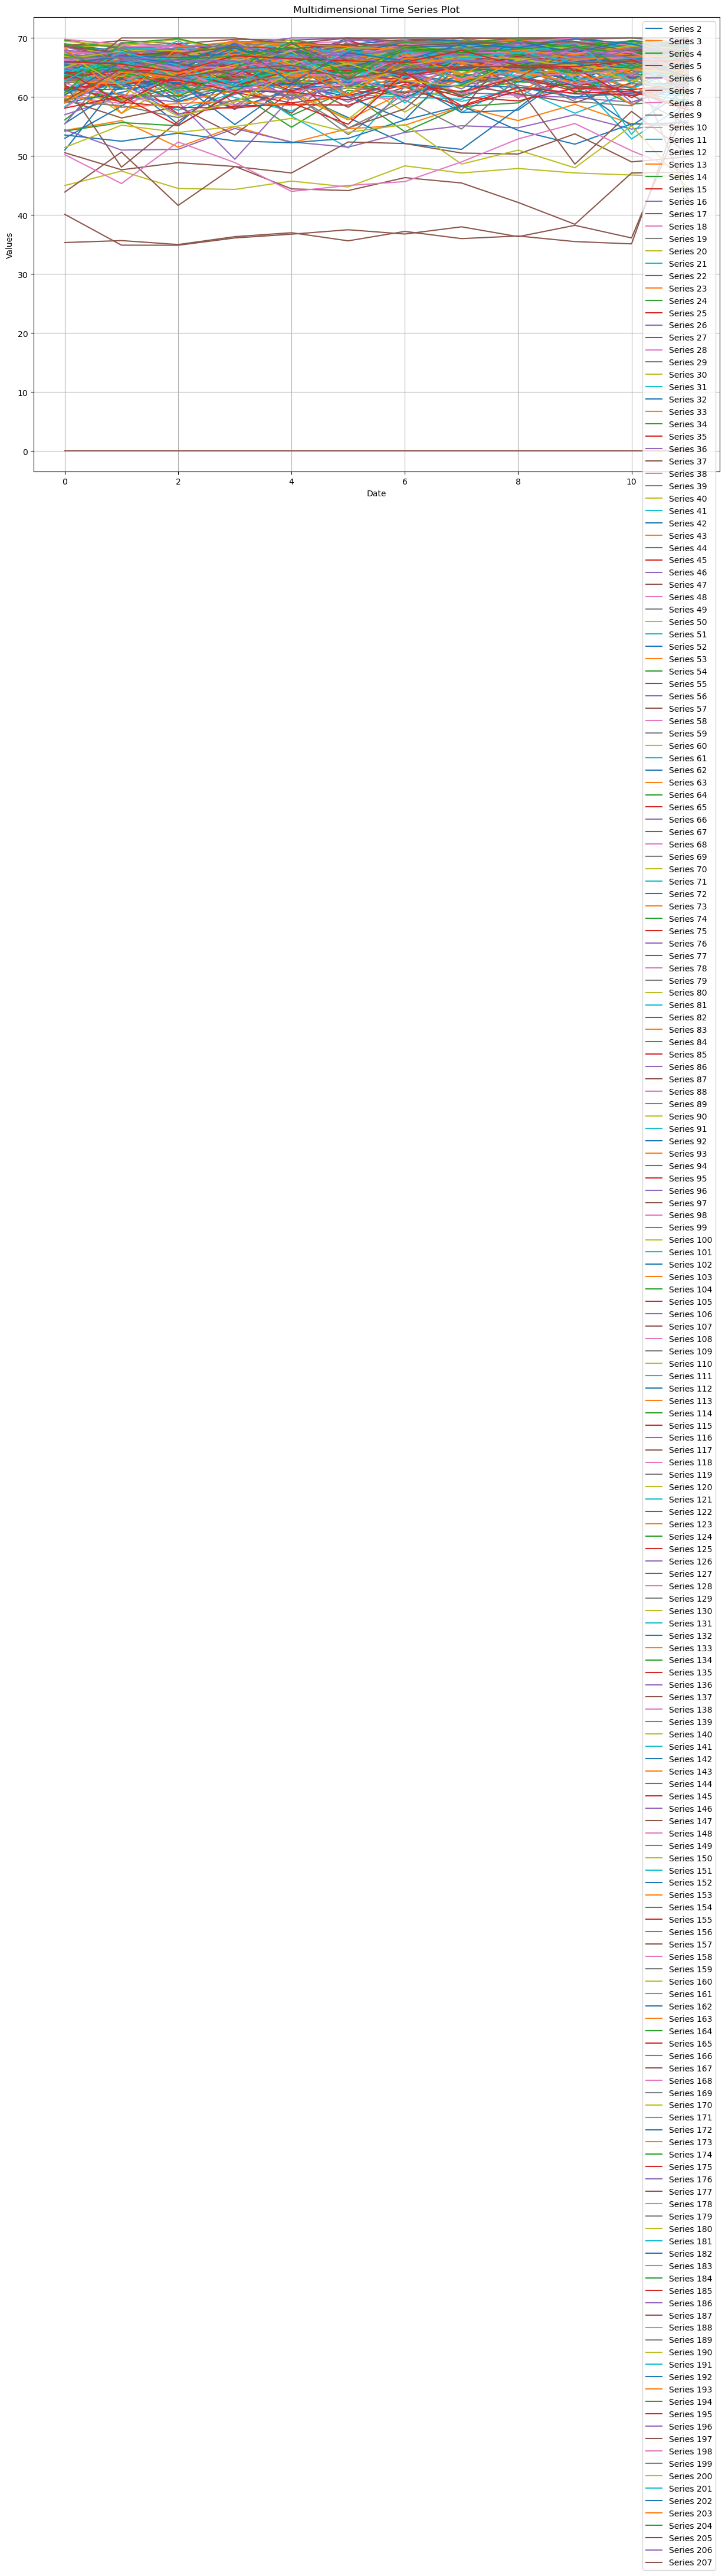

In [12]:
plot_window_exclude(exp, which)

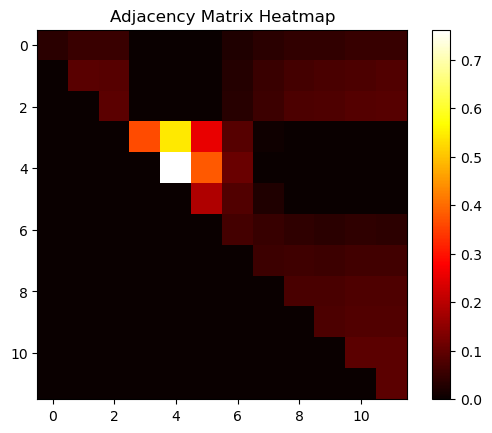

In [7]:
plt.imshow(adj_matrix[207:, 207:], cmap='hot', interpolation='nearest')

plt.colorbar()
plt.title('Adjacency Matrix Heatmap')
plt.show()



In [25]:
tt_adj = torch.einsum("bnf, bmf -> bnm", Xt, Xt) 
# tt_adj/torch.max(tt_adj)

torch.tanh( torch.relu(tt_adj)) 

tensor([[[0.5040, 0.5843, 0.6201, 0.6404, 0.6537, 0.6562, 0.6521, 0.6475,
          0.6466, 0.6506, 0.6356, 0.6298],
         [0.5843, 0.7076, 0.7671, 0.7938, 0.8084, 0.8087, 0.8121, 0.8068,
          0.8009, 0.8060, 0.7904, 0.7795],
         [0.6201, 0.7671, 0.8474, 0.8758, 0.8845, 0.8865, 0.9009, 0.8959,
          0.8886, 0.8953, 0.8804, 0.8727],
         [0.6404, 0.7938, 0.8758, 0.9092, 0.9211, 0.9247, 0.9361, 0.9332,
          0.9239, 0.9323, 0.9168, 0.9064],
         [0.6537, 0.8084, 0.8845, 0.9211, 0.9475, 0.9425, 0.9521, 0.9483,
          0.9389, 0.9453, 0.9292, 0.9157],
         [0.6562, 0.8087, 0.8865, 0.9247, 0.9425, 0.9552, 0.9605, 0.9610,
          0.9548, 0.9641, 0.9433, 0.9308],
         [0.6521, 0.8121, 0.9009, 0.9361, 0.9521, 0.9605, 0.9804, 0.9803,
          0.9740, 0.9831, 0.9616, 0.9570],
         [0.6475, 0.8068, 0.8959, 0.9332, 0.9483, 0.9610, 0.9803, 0.9848,
          0.9773, 0.9885, 0.9648, 0.9606],
         [0.6466, 0.8009, 0.8886, 0.9239, 0.9389, 0.9548, 0.9740

In [25]:
# A[0, :207, :207] = A[0, :207, :207]/torch.max(A[0, :207, :207])
# A[0, 207:, :207] = A[0, 207:, :207]/torch.max(A[0, 207:, :207])
A[0, :207, 207:] = A[0, :207, 207:]/torch.max(A[0, :207, 207:])
# A[0, 207:, 207:] = A[0, 207:, 207:]/torch.max(A[0, 207:, 207:])

In [10]:

# exp.model.tn_modules[0].graph_constructor.relation_mask_model['st'][4]


B, N, D = Xs.size()
_, T, _ = Xt.size()
node_embs = torch.concat([Xs, Xt], dim=1)

# 扩展 x1 和 x2 以便于拼接
x1_expanded = Xs.unsqueeze(2)  # 维度变为 [B, N1, 1, D]
x2_expanded = Xt.unsqueeze(1)  # 维度变为 [B, 1, N2, D]

# 在拼接维度上重复以匹配对方的维度
x1_tiled = x1_expanded.repeat(1, 1, T, 1)  # [B, N1, N2, D]
x2_tiled = x2_expanded.repeat(1, N, 1, 1)  # [B, N1, N2, D]
# 拼接 xs 和 xt
x_combined = torch.cat((x1_tiled, x2_tiled), dim=-1)  # [B, N, O, 2D]
# 重塑并应用 MLP
x_combined = x_combined.reshape(B, N * T, -1)  # [B, N*O, 2D]
x1 = exp.model.tn_modules[0].graph_constructor.relation_attention_model['ts'](Xt, Xs)
x1
# x2 = exp.model.tn_modules[0].graph_constructor.relation_mask_model['st'][1](x1)
# x3 = exp.model.tn_modules[0].graph_constructor.relation_mask_model['st'][2](x2)
# x4 = exp.model.tn_modules[0].graph_constructor.relation_mask_model['st'][3](x3)


tensor([[[0.0043, 0.0050, 0.0051,  ..., 0.0049, 0.0039, 0.0052],
         [0.0056, 0.0042, 0.0053,  ..., 0.0041, 0.0037, 0.0055],
         [0.0062, 0.0037, 0.0045,  ..., 0.0040, 0.0042, 0.0049],
         ...,
         [0.0062, 0.0036, 0.0050,  ..., 0.0034, 0.0038, 0.0054],
         [0.0067, 0.0039, 0.0053,  ..., 0.0038, 0.0039, 0.0060],
         [0.0061, 0.0039, 0.0053,  ..., 0.0040, 0.0037, 0.0058]]],
       device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [18]:
A[0][:30, :30]

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         1.2190e-06, 0.0000e+00, 0.0000e+00, 9.3924e-08, 0.0000e+00, 0.0000e+00,
         2.9243e-07, 0.0000e+00, 0.0000e+00, 1.1999e-06, 6.5040e-07, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 1.6831e-06, 1.5091e-06, 0.0000e+00],
        [7.2052e-06, 0.0000e+00, 4.4362e-06, 5.0094e-06, 3.0972e-06, 1.4776e-06,
         1.0173e-05, 3.0683e-06, 1.6383e-06, 6.8540e-06, 3.3569e-09, 4.7224e-07,
         7.8949e-06, 4.2181e-06, 5.3934e-06, 9.3398e-06, 9.4001e-06, 1.0477e-06,
         4.8047e-06, 7.4857e-06, 7.3164e-06, 6.8568e-06, 8.6763e-07, 2.8892e-06,
         2.3252e-06, 3.6502e-06, 6.3922e-06, 9.6955e-06, 1.0628e-05, 6.4893e-06],
        [3.6010e-06, 0.0000e+00, 0.0000e+00, 1.1544e-06, 0.0000e+00, 0.0000e+00,
         6.2046e-06, 0.0000e+00, 0.0000e+00, 3.3287e-06, 0.0000e+00, 0.0000e+00,
         3.7522e-06, 0.000

In [5]:
# exp.model.tn_modules[0].graph_constructor.relation_mask_model['st'][4]


B, N, D = Xs.size()
_, T, _ = Xt.size()
node_embs = torch.concat([Xs, Xt], dim=1)

# 扩展 x1 和 x2 以便于拼接
x1_expanded = Xs.unsqueeze(2)  # 维度变为 [B, N1, 1, D]
x2_expanded = Xt.unsqueeze(1)  # 维度变为 [B, 1, N2, D]

# 在拼接维度上重复以匹配对方的维度
x1_tiled = x1_expanded.repeat(1, 1, T, 1)  # [B, N1, N2, D]
x2_tiled = x2_expanded.repeat(1, N, 1, 1)  # [B, N1, N2, D]
# 拼接 xs 和 xt
x_combined = torch.cat((x1_tiled, x2_tiled), dim=-1)  # [B, N, O, 2D]
# 重塑并应用 MLP
x_combined = x_combined.reshape(B, N * T, -1)  # [B, N*O, 2D]



# # st_adj  = exp.model.tn_modules[0].graph_constructor.build_sub_graph(spatial_nodes, temporal_nodes,'st' )
# x1 = exp.model.tn_modules[0].graph_constructor.relation_mask_model['st'][0](x_combined)
# x2 = exp.model.tn_modules[0].graph_constructor.relation_mask_model['st'][1](x1)
# x3 = exp.model.tn_modules[0].graph_constructor.relation_mask_model['st'][2](x2)
# x4 = exp.model.tn_modules[0].graph_constructor.relation_mask_model['st'][3](x3)
# # x5 = exp.model.tn_modules[0].graph_constructor.relation_mask_model['st'][4](x4)
# torch.relu(x4)


tensor([[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]], device='cuda:0', grad_fn=<ReluBackward0>)

In [13]:
 exp.model.tn_modules[0].graph_constructor.relation_attention_model['st']

Parameter containing:
tensor([[ 5.7703e-05,  1.7914e-02,  2.0892e-03,  ...,  1.8131e-02,
          1.1777e-02, -1.5489e-02],
        [ 2.8544e-11, -8.7975e-03,  9.4017e-05,  ..., -3.2820e-06,
          1.6195e-12, -1.3842e-03],
        [ 4.5393e-03,  4.5705e-12,  1.9507e-10,  ..., -9.6138e-03,
          6.2140e-04, -2.5694e-02],
        ...,
        [-2.4007e-02, -1.6211e-02,  4.1973e-03,  ..., -1.5733e-04,
          2.2833e-02,  2.7740e-03],
        [ 6.5493e-03,  6.6936e-13,  1.8947e-11,  ..., -8.1227e-03,
         -5.6776e-03, -1.1034e-06],
        [-7.0895e-06,  8.0274e-13,  6.5809e-09,  ...,  1.9165e-11,
          1.2275e-04, -4.9865e-04]], device='cuda:0', requires_grad=True)

In [15]:
 exp.model.tn_modules[0].graph_constructor.build_ts_graph(Xt, Xs)

tensor([[[0.0032, 0.0028, 0.0030,  ..., 0.0030, 0.0023, 0.0026],
         [0.0028, 0.0025, 0.0027,  ..., 0.0028, 0.0019, 0.0020],
         [0.0037, 0.0033, 0.0037,  ..., 0.0038, 0.0026, 0.0030],
         ...,
         [0.0025, 0.0026, 0.0030,  ..., 0.0032, 0.0016, 0.0022],
         [0.0045, 0.0039, 0.0045,  ..., 0.0041, 0.0032, 0.0037],
         [0.0039, 0.0032, 0.0038,  ..., 0.0033, 0.0024, 0.0029]]],
       device='cuda:0', grad_fn=<AddBackward0>)

In [12]:


x1 = exp.model.tn_modules[0].graph_constructor.relation_attention_model['st'][0](x_combined)
x2 = exp.model.tn_modules[0].graph_constructor.relation_mask_model['st'][1](x1)
x3 = exp.model.tn_modules[0].graph_constructor.relation_mask_model['st'][2](x2)
x4 = exp.model.tn_modules[0].graph_constructor.relation_mask_model['st'][3](x3)
# x5 = exp.model.tn_modules[0].graph_constructor.relation_mask_model['st'][4](x4)
torch.relu(x4)



Linear(in_features=64, out_features=32, bias=True)

In [4]:
import torch
import torch.nn as nn
N = 10
B = 10
O = 10
# 假设 N 和 O 已经定义
num_features = N * O

# 创建批量归一化层
batch_norm = nn.BatchNorm1d(num_features)

# 假设 input 是一个 [B, N*O, 1] 形状的张量
input = torch.randn(B, N*O, 1)

# 应用批量归一化
# 注意，由于 nn.BatchNorm1d 期望的输入形状是 [B, C, L] (其中C是通道数，L是长度)，
# 我们需要先使用 squeeze() 函数去除长度为1的维度，然后应用 batch_norm，最后再使用 unsqueeze() 恢复维度。
output = batch_norm(input.squeeze(-1)).unsqueeze(-1)


In [6]:
latent_dim = 10
from torch import nn
a = nn.Sequential(
                    nn.Linear(latent_dim+latent_dim, latent_dim),
                    nn.ELU(),
                    nn.LayerNorm(latent_dim),
                    nn.Linear(latent_dim, 1),
                    nn.LayerNorm(1),
                )

x = torch.randn(10 , 10, latent_dim*2)
a(x)

tensor([[[ 9.9153e-08],
         [-2.0481e-06],
         [-6.2690e-06],
         [-6.0040e-06],
         [-2.2863e-06],
         [ 1.2838e-08],
         [-3.6082e-06],
         [ 2.0643e-06],
         [-3.1083e-06],
         [ 1.9971e-07]],

        [[ 6.7064e-06],
         [ 1.0548e-07],
         [ 2.8796e-06],
         [ 7.4608e-08],
         [-4.3598e-06],
         [ 4.7173e-07],
         [ 2.6482e-06],
         [-2.7141e-06],
         [-1.9050e-07],
         [ 3.3048e-07]],

        [[ 1.6782e-06],
         [ 3.3499e-06],
         [ 2.0982e-07],
         [-3.6948e-06],
         [-6.8231e-07],
         [ 2.2127e-06],
         [-1.1914e-06],
         [-1.2874e-07],
         [-1.9957e-06],
         [-1.4575e-06]],

        [[-1.0297e-06],
         [ 9.6347e-07],
         [ 2.3048e-06],
         [ 2.3068e-06],
         [-1.2061e-06],
         [-2.6150e-08],
         [ 7.1187e-06],
         [-4.2343e-06],
         [-5.8074e-07],
         [ 3.3550e-06]],

        [[-1.0326e-06],
        